# Parent Involvement and Student Success

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading the data
ps = pd.read_excel(r'C:\Users\Dell\Desktop\Parent Involvement and Student Success.xlsx')

In [3]:
ps.keys()

Index(['Student ID', 'Student Name', 'Homework Help Frequency', 'Behaviour',
       'Extra-curricular Activities', 'Parent Teacher Meeting', 'Attendance',
       'Grade', 'Percentage', 'GPA'],
      dtype='object')

In [4]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student ID                   100 non-null    int64  
 1   Student Name                 100 non-null    object 
 2   Homework Help Frequency      100 non-null    object 
 3   Behaviour                    100 non-null    object 
 4   Extra-curricular Activities  100 non-null    object 
 5   Parent Teacher Meeting       100 non-null    object 
 6   Attendance                   100 non-null    int64  
 7   Grade                        100 non-null    object 
 8   Percentage                   100 non-null    float64
 9   GPA                          100 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 7.9+ KB


In [5]:
ps.dtypes

Student ID                       int64
Student Name                    object
Homework Help Frequency         object
Behaviour                       object
Extra-curricular Activities     object
Parent Teacher Meeting          object
Attendance                       int64
Grade                           object
Percentage                     float64
GPA                            float64
dtype: object

In [6]:
ps.describe()

Student ID  Attendance  Percentage         GPA
count  100.000000  100.000000  100.000000  100.000000
mean    50.500000   88.170000   75.165700    7.516700
std     29.011492    6.837294   16.075452    1.607186
min      1.000000   75.000000   50.170000    5.020000
25%     25.750000   83.000000   60.710000    6.070000
50%     50.500000   88.500000   73.650000    7.365000
75%     75.250000   93.000000   90.600000    9.060000
max    100.000000  100.000000   99.960000    9.990000

In [7]:
ps.head()

Student ID Student Name Homework Help Frequency Behaviour  \
0           1    Tom Smith                   Often   Average   
1           2   Anna Davis               Sometimes      Poor   
2           3   Tom Thomas                   Often      Poor   
3           4   Anna Brown                   Often      Good   
4           5   Sam Thomas               Sometimes      Poor   

  Extra-curricular Activities Parent Teacher Meeting  Attendance Grade  \
0                         Few                   Once          94     E   
1                         Few                   Once          85     A   
2                         Few               Multiple          96     D   
3                        None                  Never          99     A   
4                         Few                  Never          91     B   

   Percentage   GPA  
0       52.93  5.29  
1       97.81  9.78  
2       62.99  6.30  
3       92.26  9.23  
4       81.16  8.12

In [8]:
ps.tail()

Student ID  Student Name Homework Help Frequency Behaviour  \
95          96    John White                   Often      Poor   
96          97       Tom Doe                   Often      Good   
97          98  Sue Anderson                   Often      Poor   
98          99     Tom White                   Often   Average   
99         100       Eva Doe                   Often      Poor   

   Extra-curricular Activities Parent Teacher Meeting  Attendance Grade  \
95                        Many                   Once          97     A   
96                         Few               Multiple          77     A   
97                        None                   Once          90     D   
98                        None                   Once          88     E   
99                         Few                   Once          98     B   

    Percentage   GPA  
95       95.59  9.56  
96       95.88  9.59  
97       69.17  6.92  
98       56.70  5.67  
99       83.36  8.34

# Exploratory Data Analysis

In [9]:
#checking the null values
ps.isnull().sum()

Student ID                     0
Student Name                   0
Homework Help Frequency        0
Behaviour                      0
Extra-curricular Activities    0
Parent Teacher Meeting         0
Attendance                     0
Grade                          0
Percentage                     0
GPA                            0
dtype: int64

<Axes: >

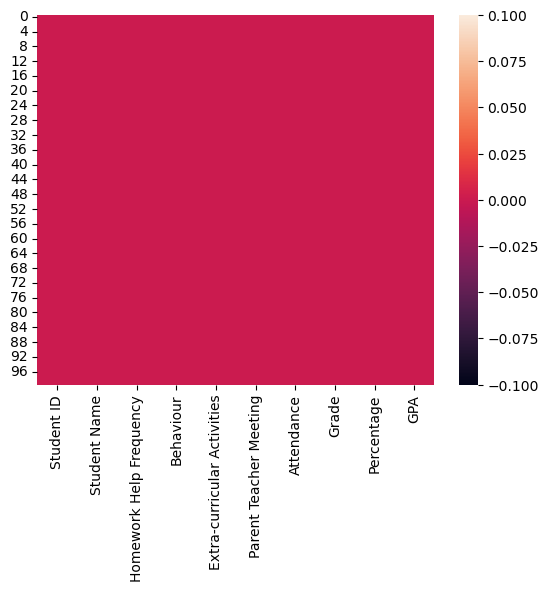

In [10]:
sns.heatmap(ps.isnull())

In [11]:
#Univariate Analysis

<Axes: xlabel='Attendance', ylabel='Density'>

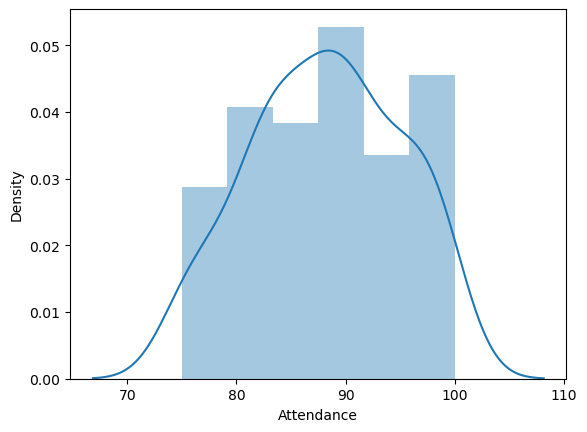

In [12]:
sns.distplot(ps['Attendance'])

<Axes: xlabel='Percentage', ylabel='Density'>

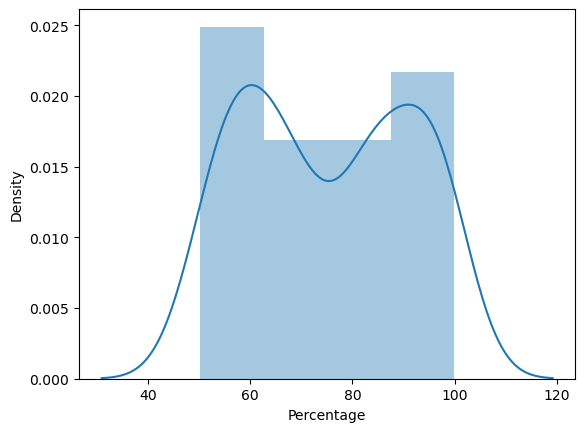

In [13]:
sns.distplot(ps['Percentage'])

<Axes: xlabel='GPA', ylabel='Density'>

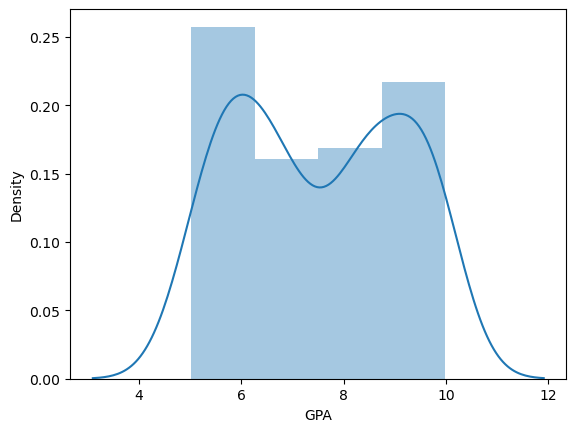

In [14]:
sns.distplot(ps['GPA'])

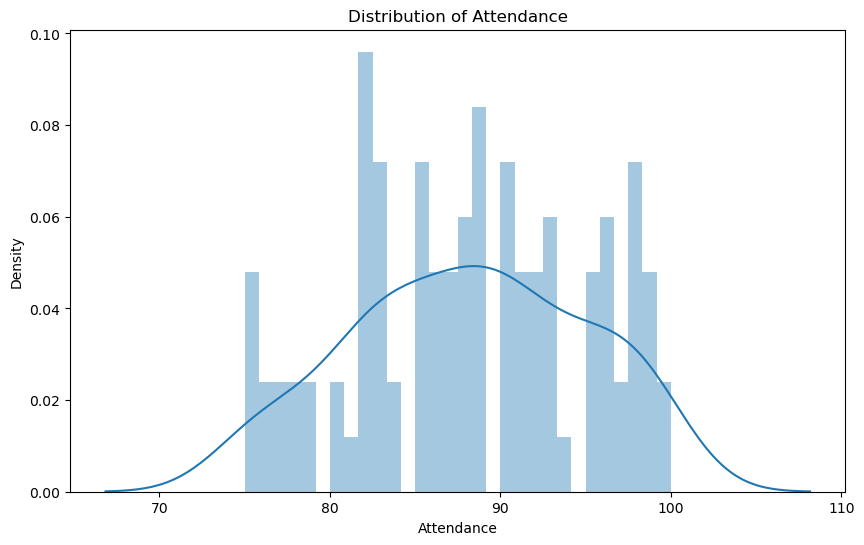

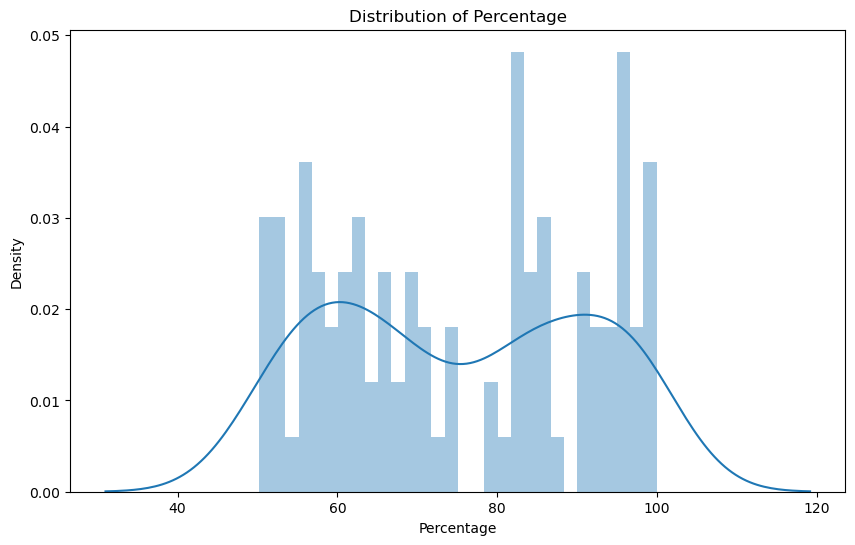

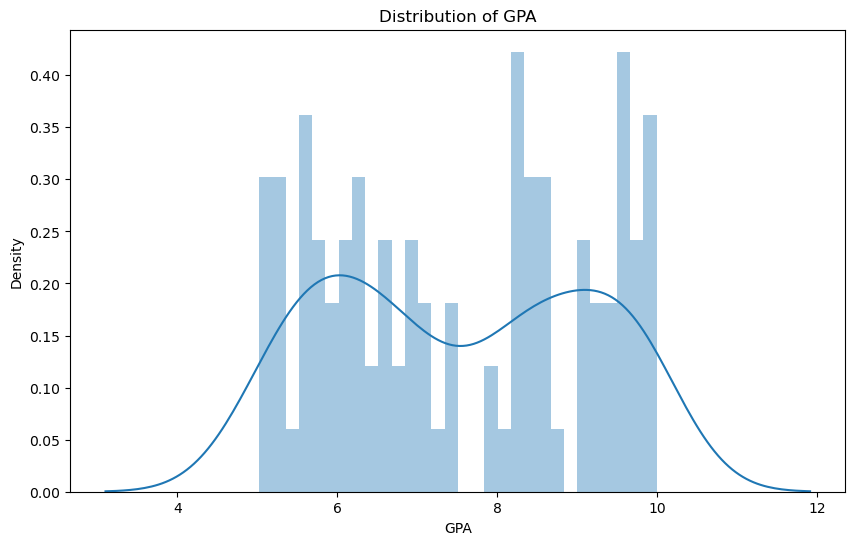

In [15]:
numerical_columns = ['Attendance', 'Percentage', 'GPA']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(ps[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

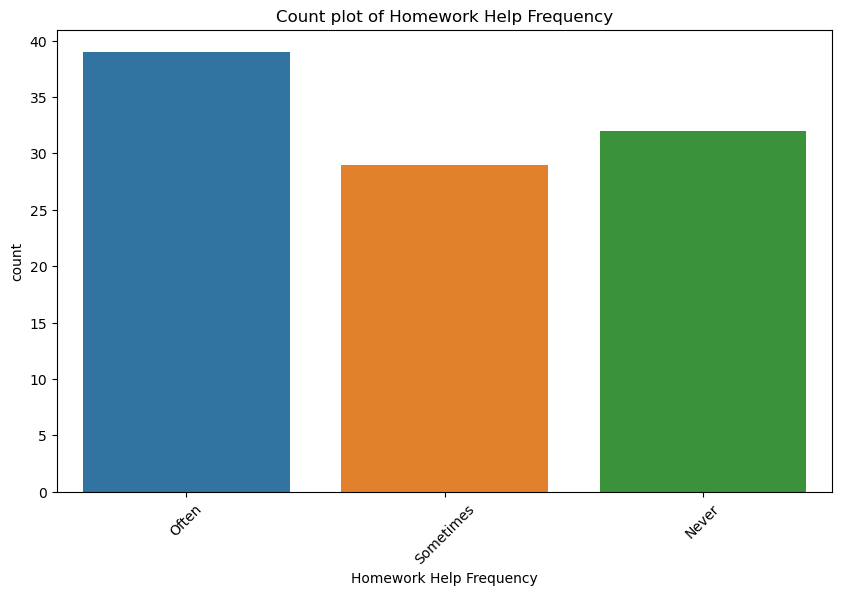

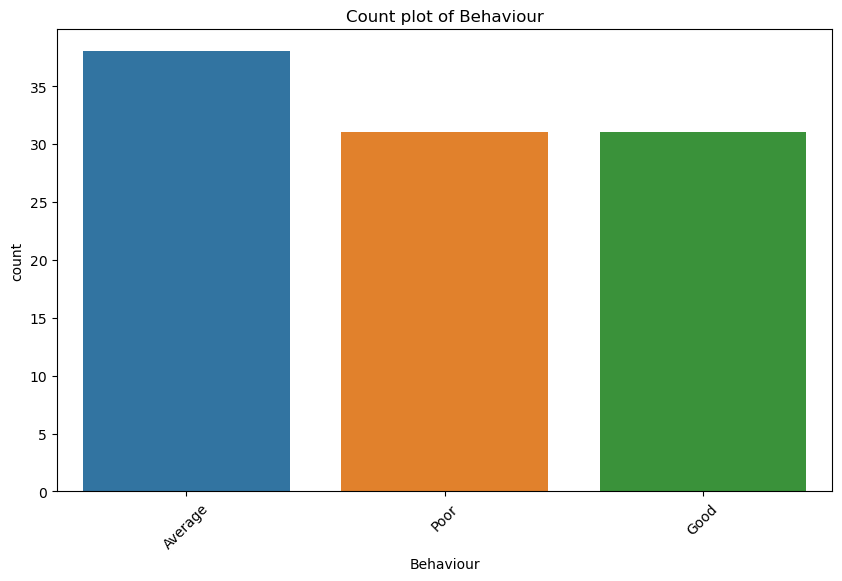

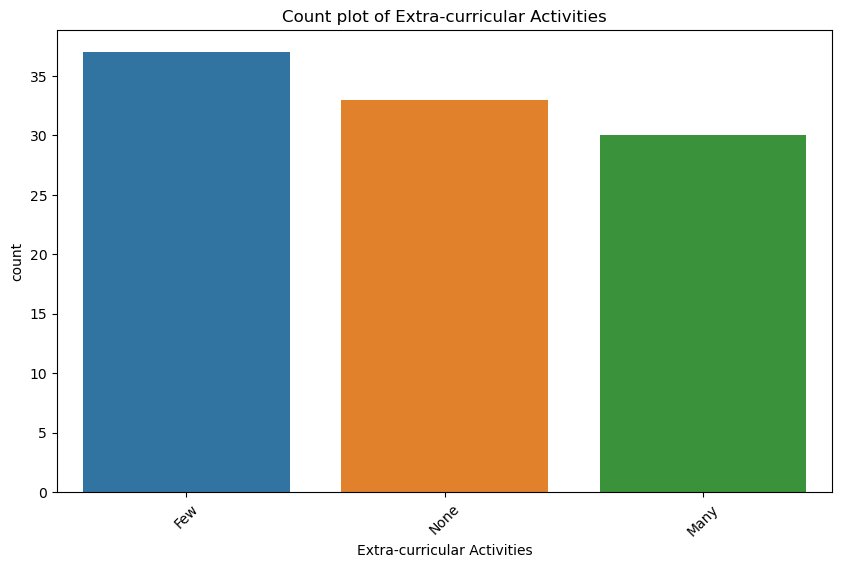

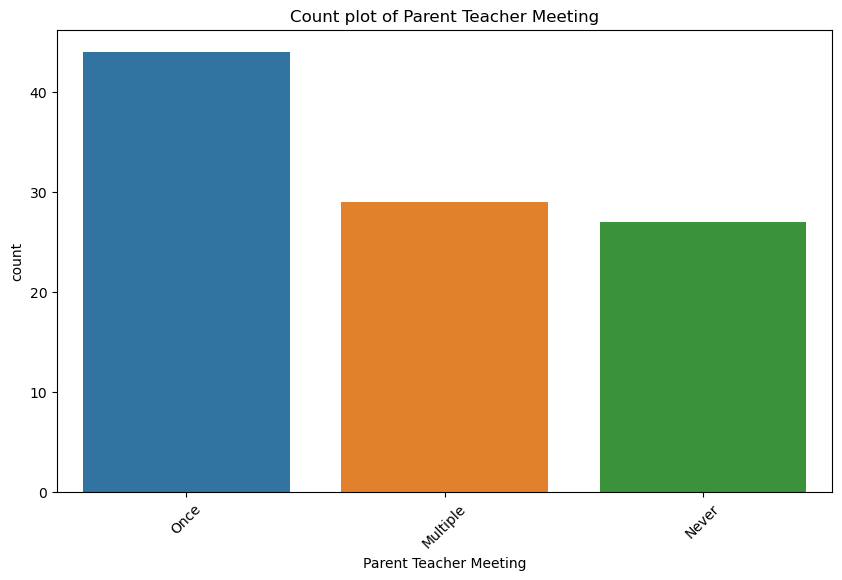

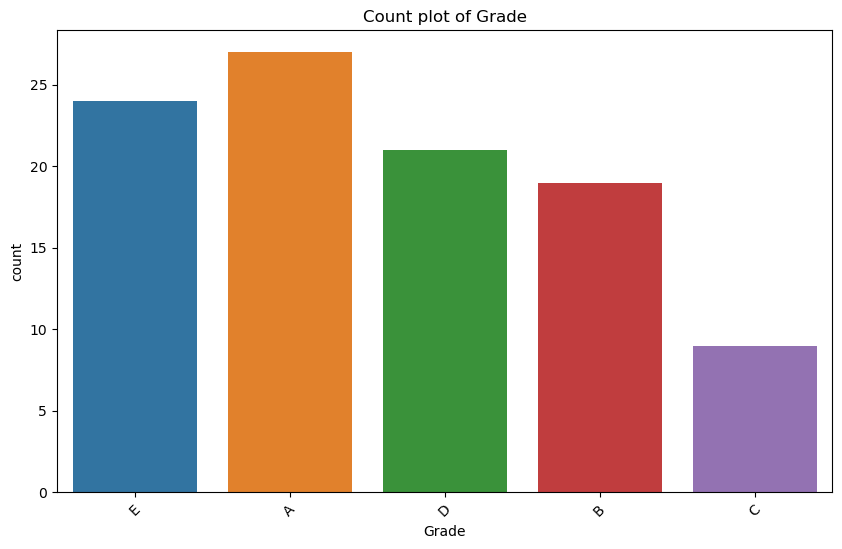

In [16]:
# Count plots for categorical columns
categorical_columns = ['Homework Help Frequency', 'Behaviour', 'Extra-curricular Activities', 'Parent Teacher Meeting', 'Grade']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=ps)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


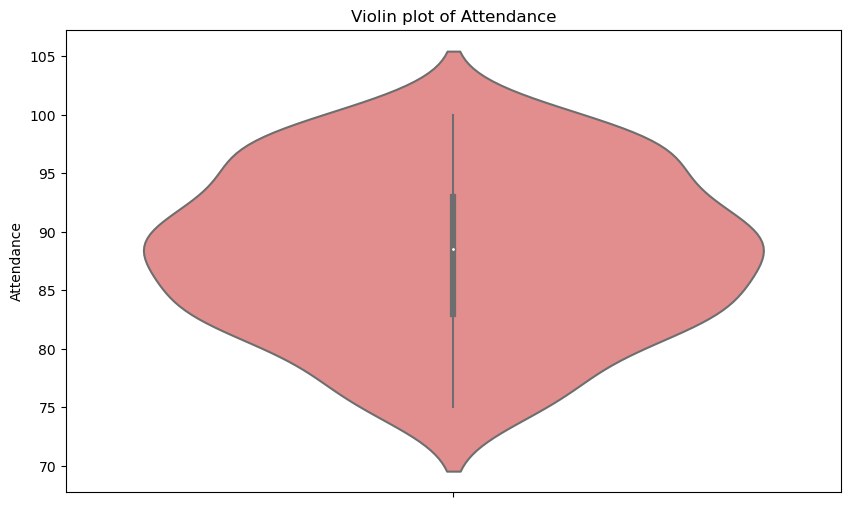

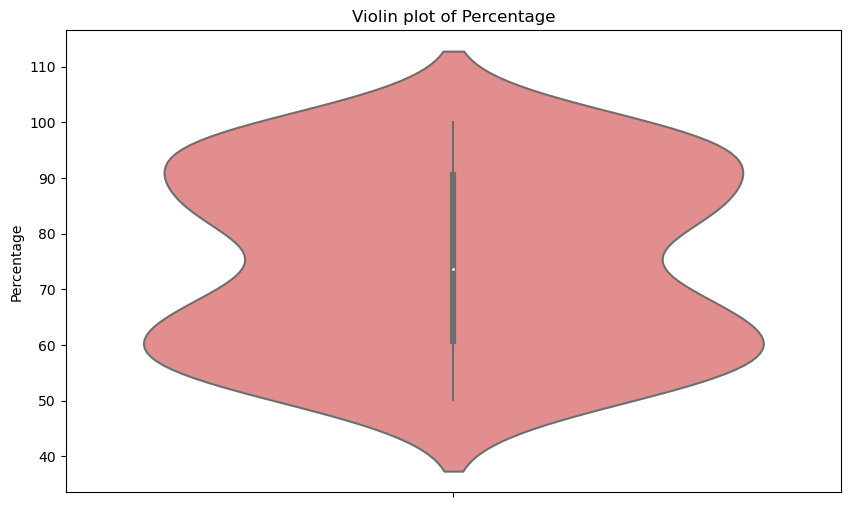

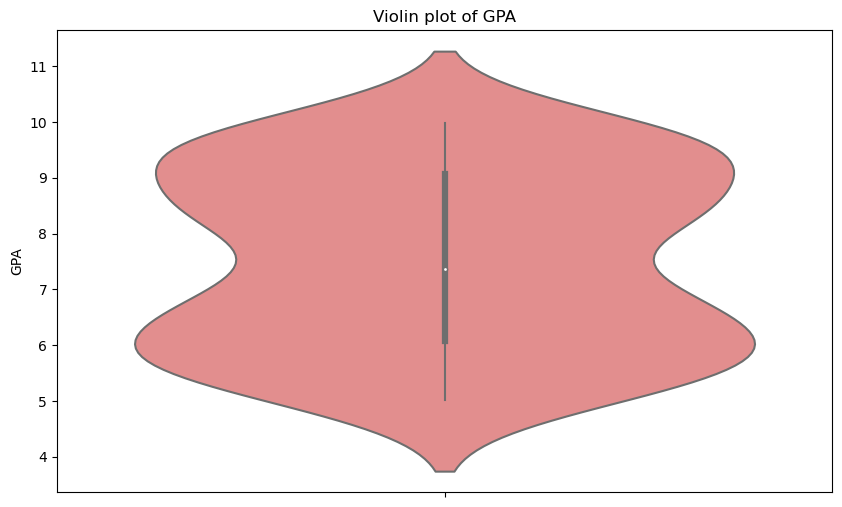

In [17]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(y=ps[col], color='lightcoral')
    plt.title(f'Violin plot of {col}')
    plt.show()

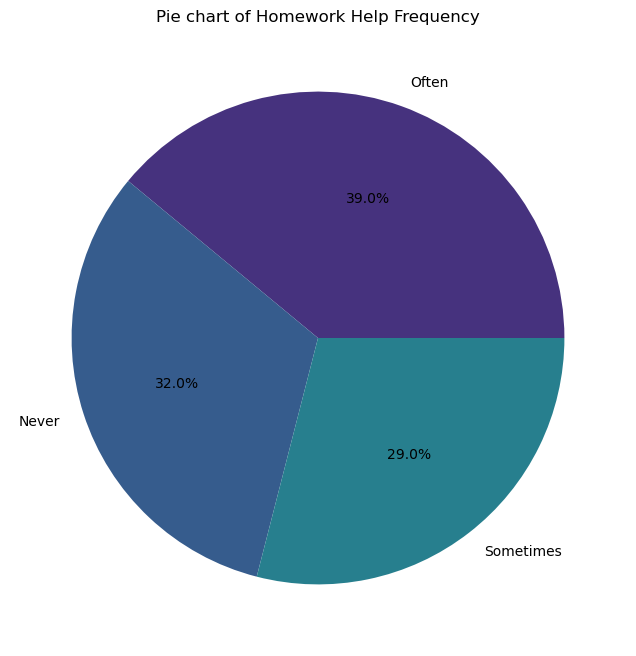

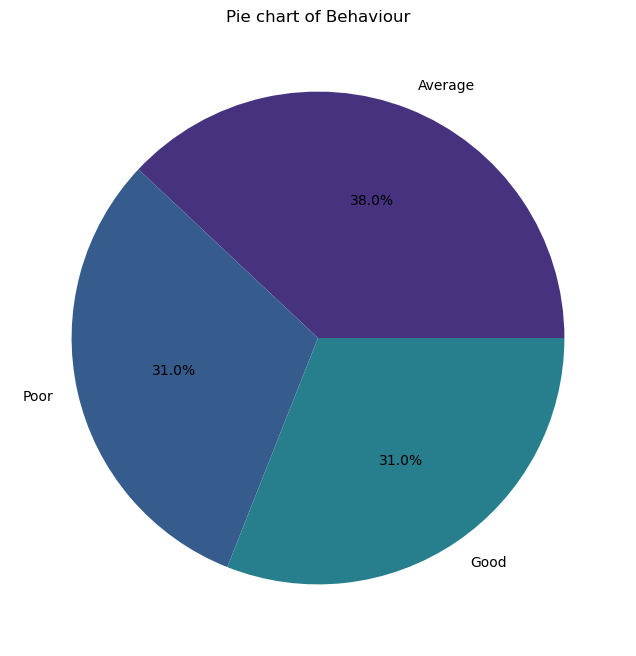

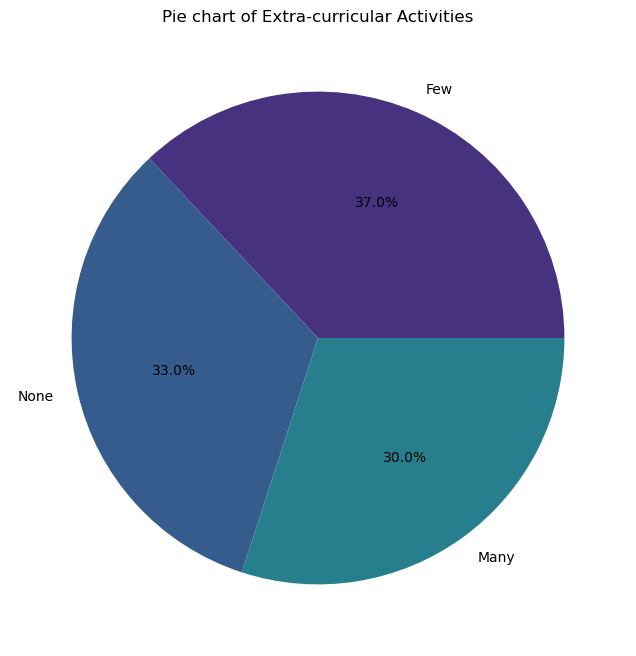

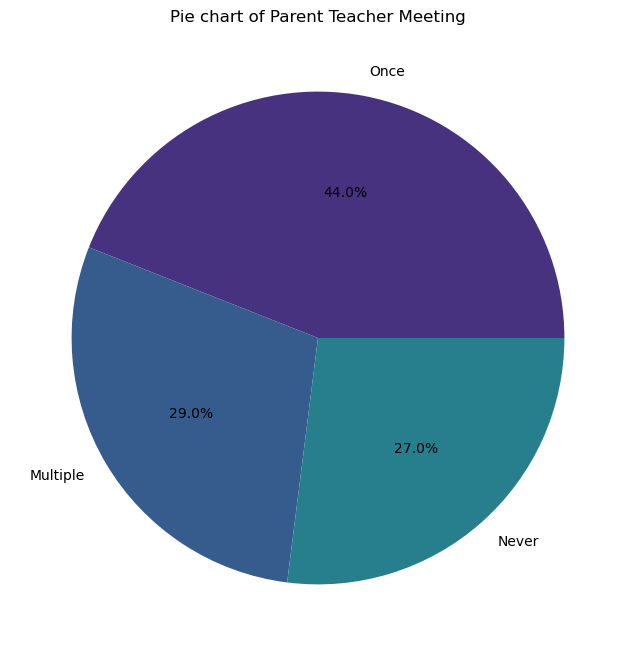

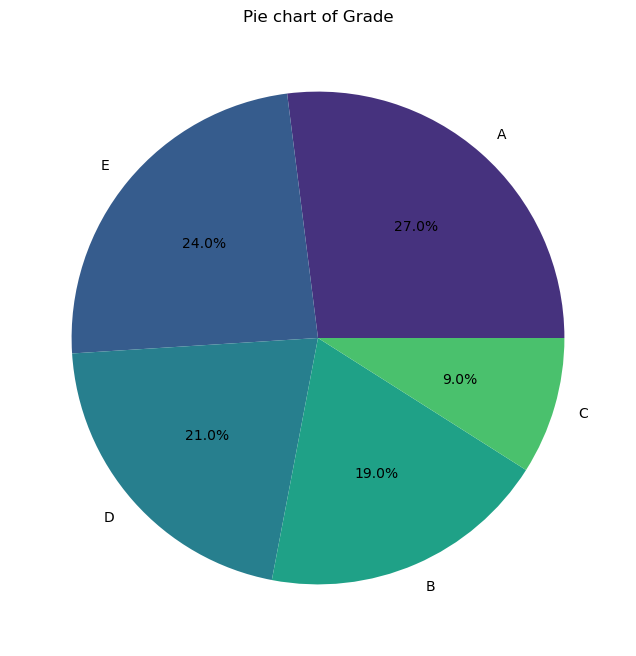

In [18]:
for col in categorical_columns:
    plt.figure(figsize=(8, 8))
    ps[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
    plt.title(f'Pie chart of {col}')
    plt.ylabel('')
    plt.show()

# BI VARIATE

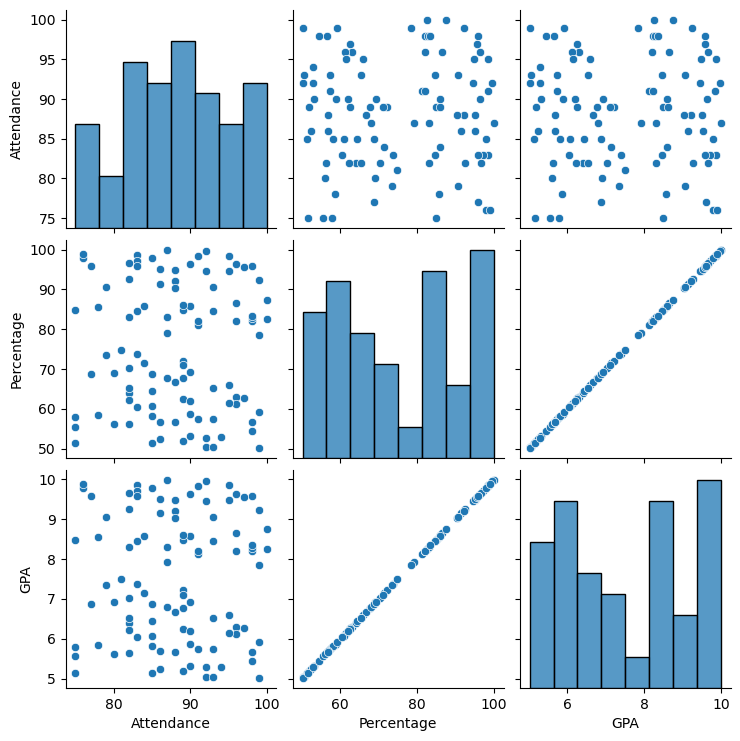

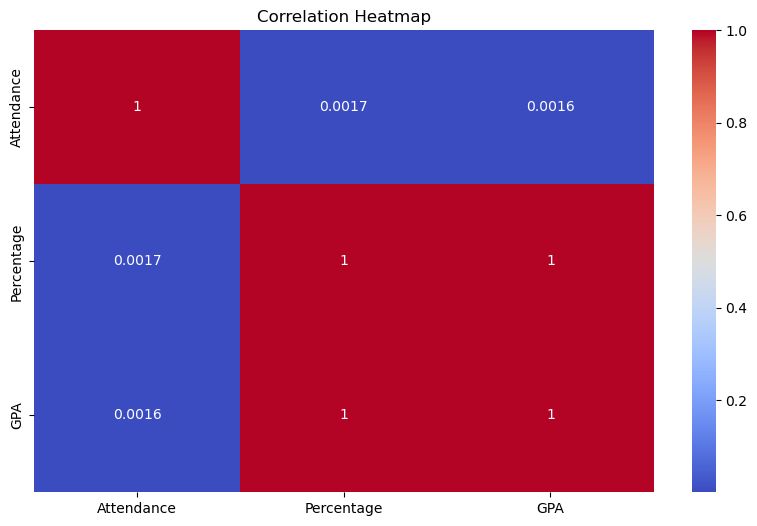

In [19]:
# Pairplot to see the relationship between numerical variables
sns.pairplot(ps[numerical_columns])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ps[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


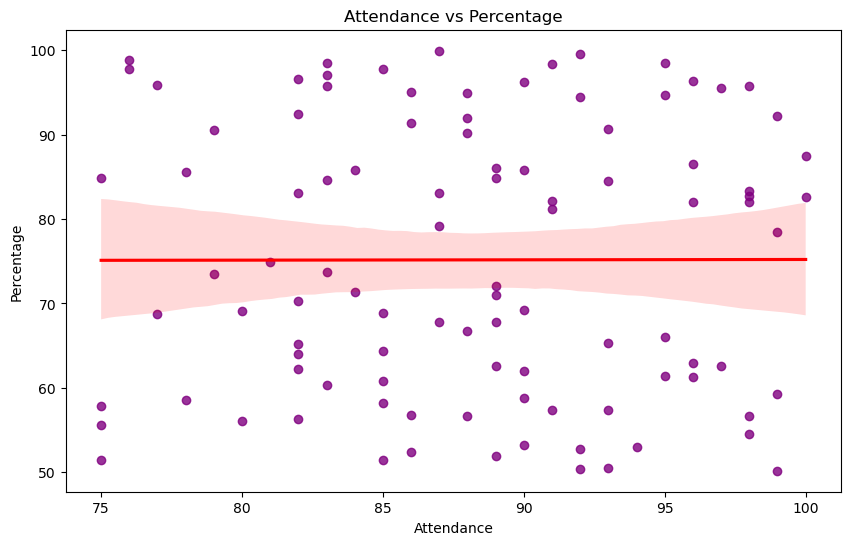

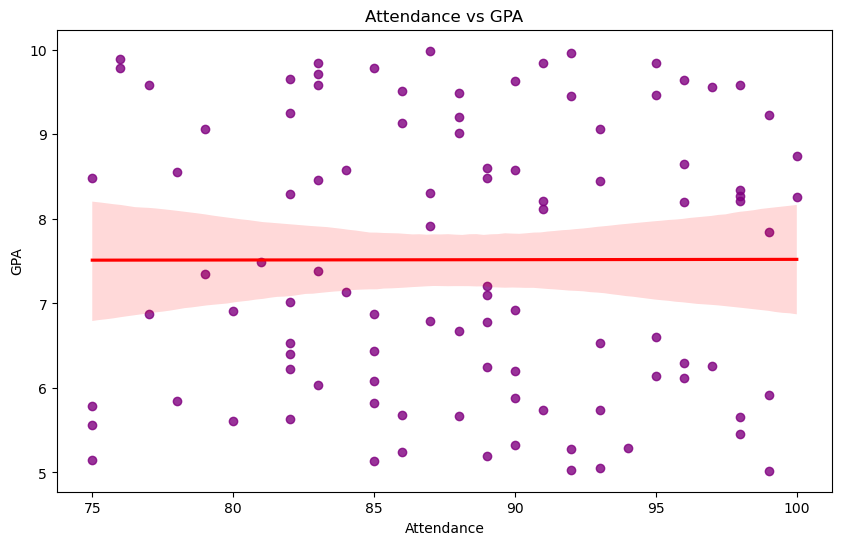

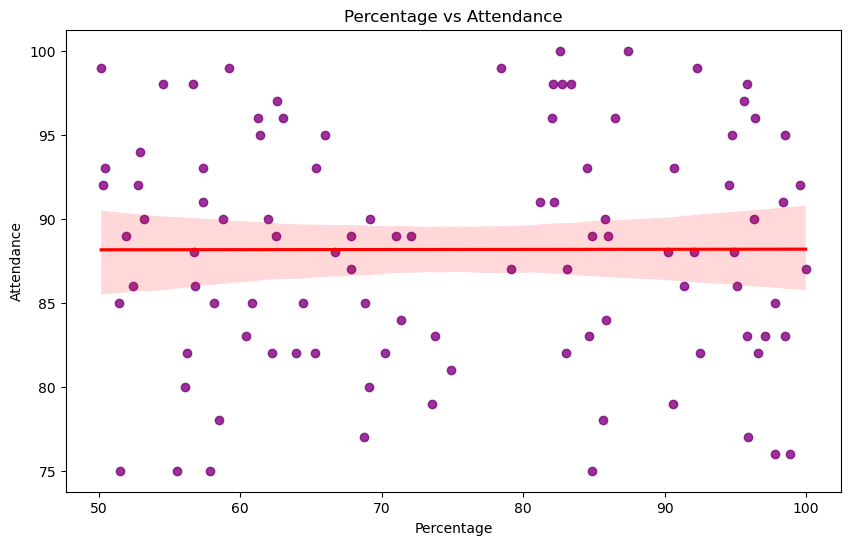

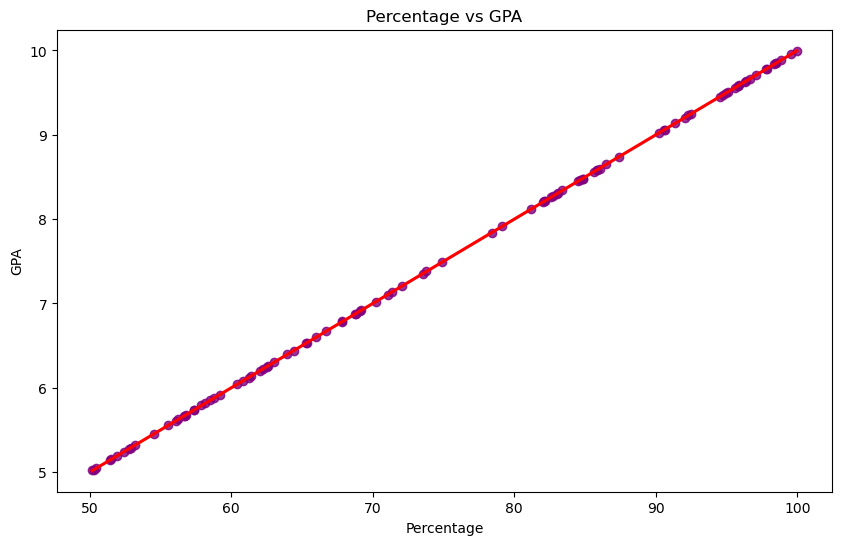

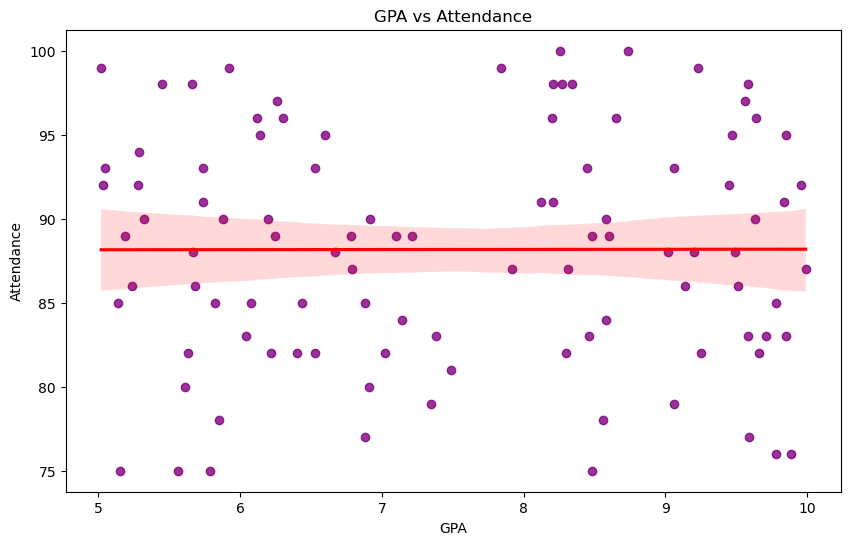

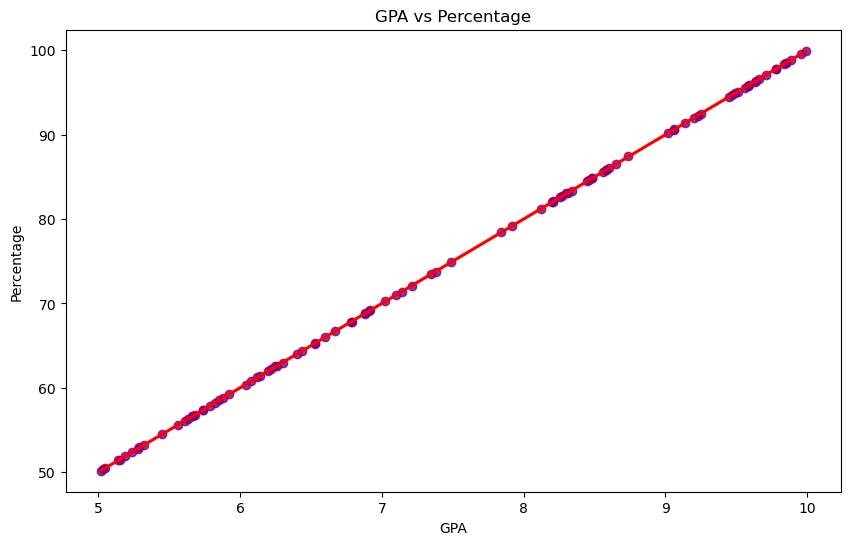

In [20]:
for col1 in numerical_columns:
    for col2 in numerical_columns:
        if col1 != col2:
            plt.figure(figsize=(10, 6))
            sns.regplot(x=col1, y=col2, data=ps, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
            plt.title(f'{col1} vs {col2}')
            plt.show()

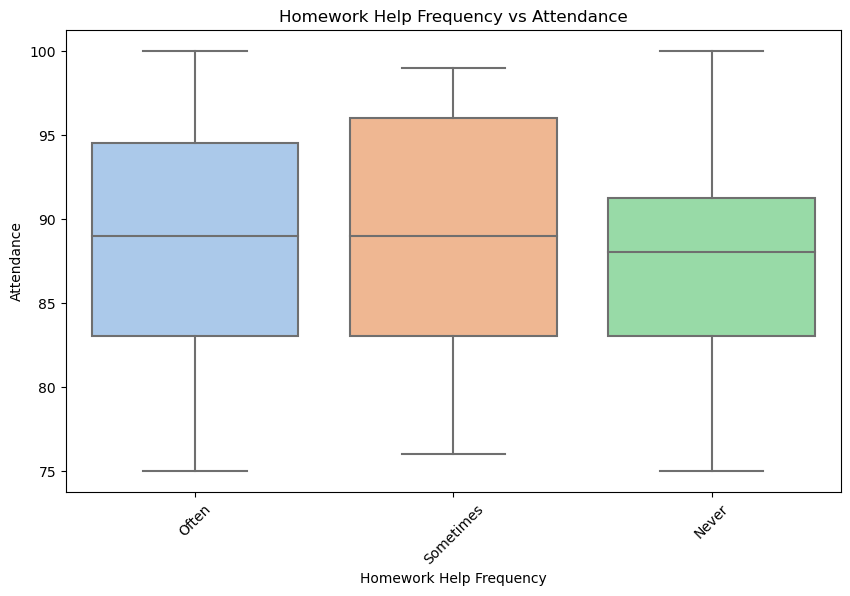

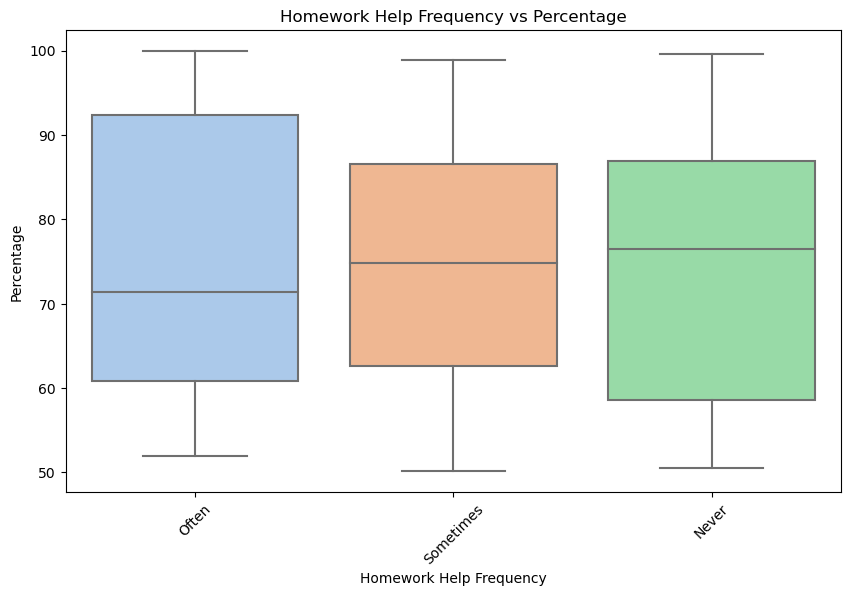

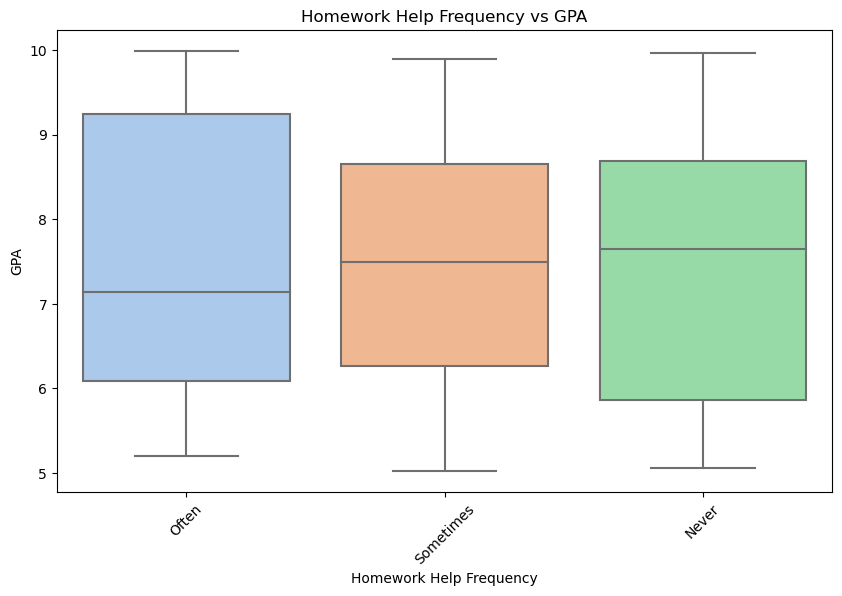

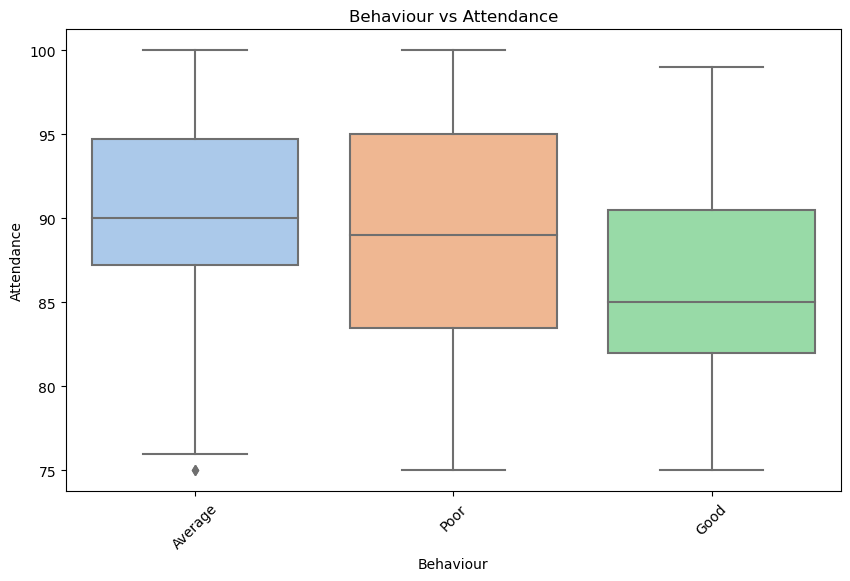

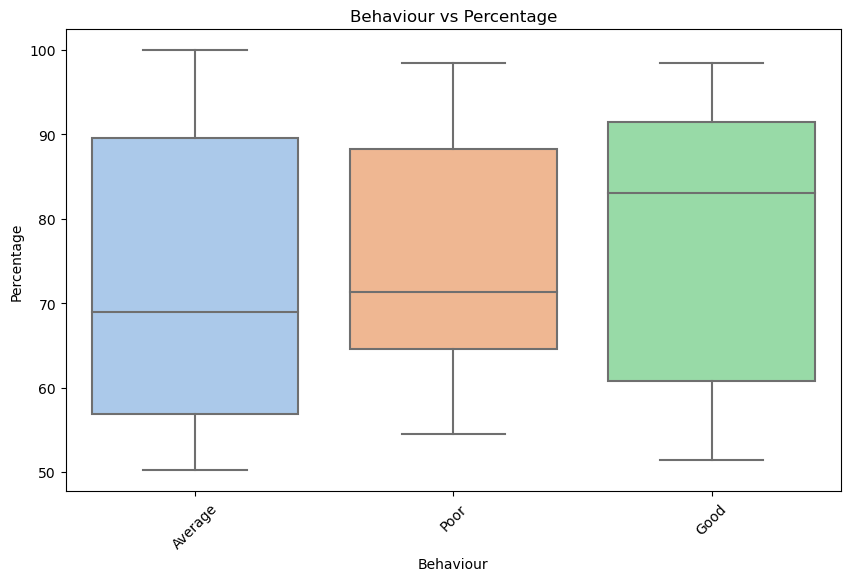

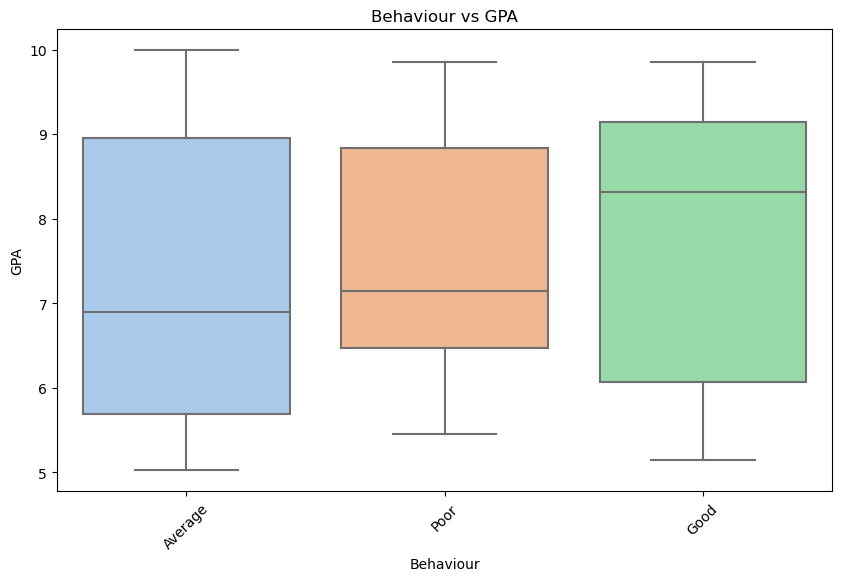

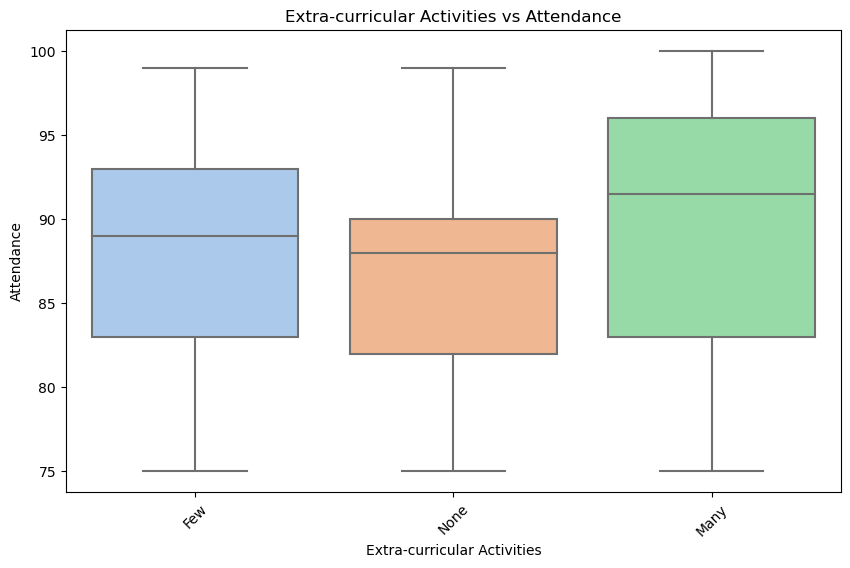

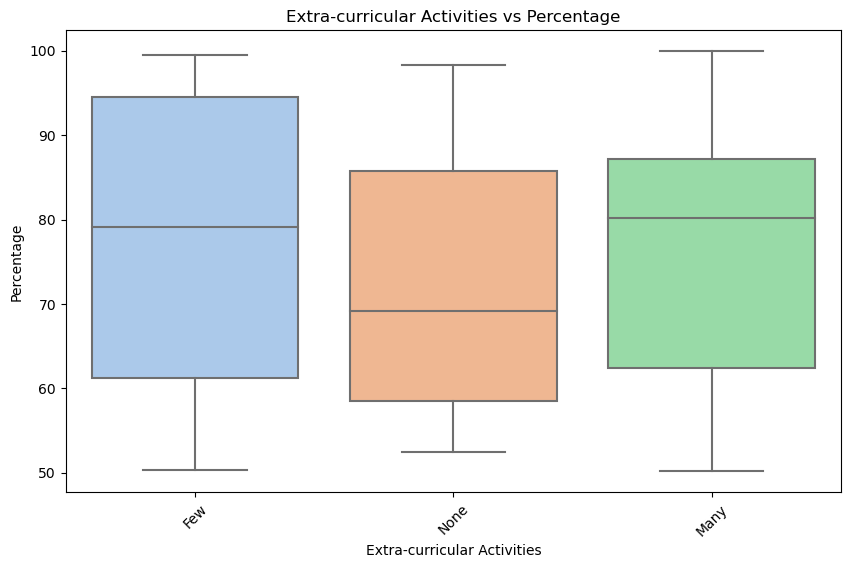

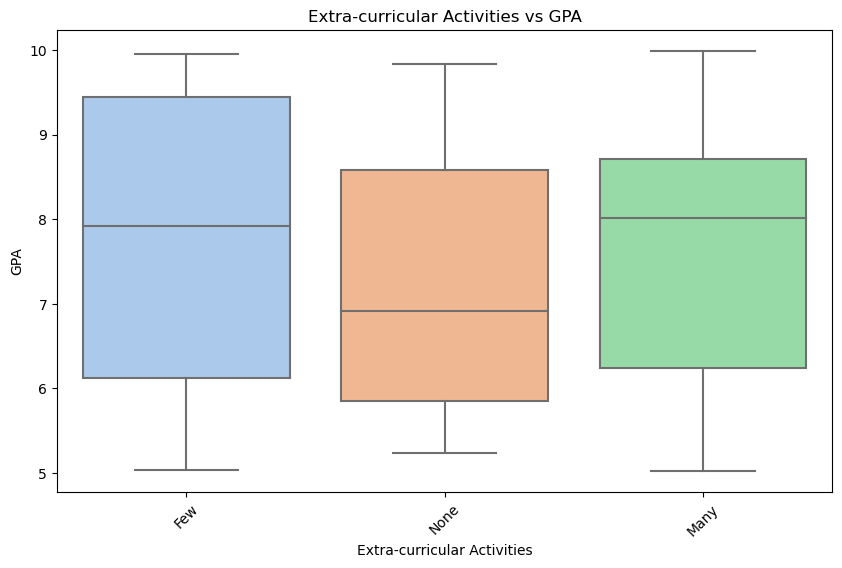

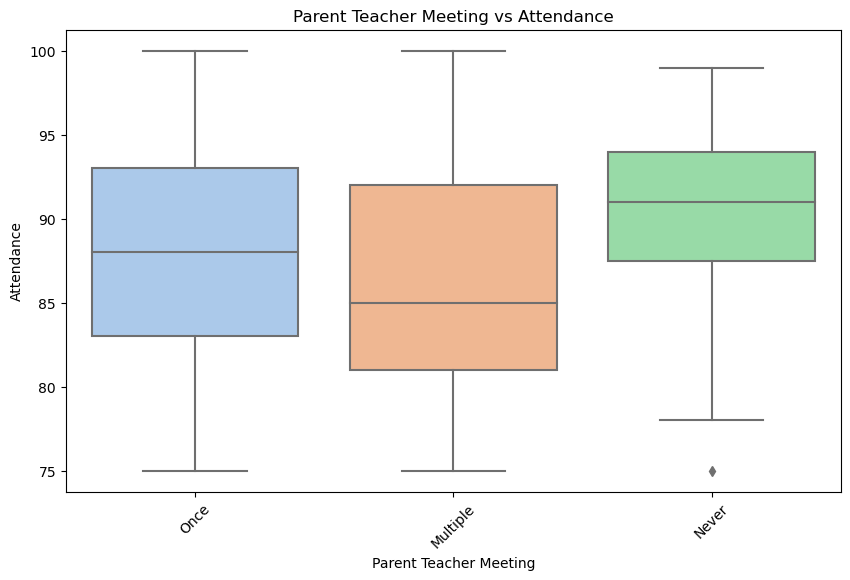

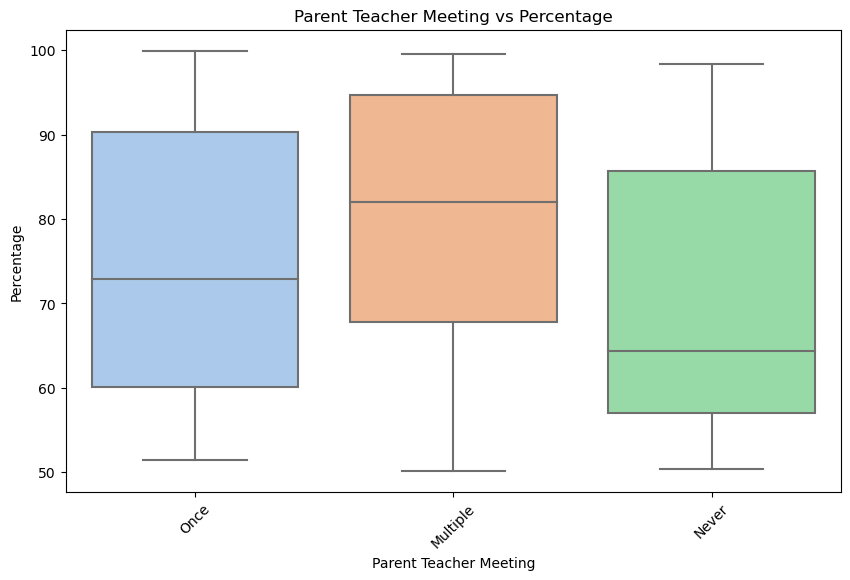

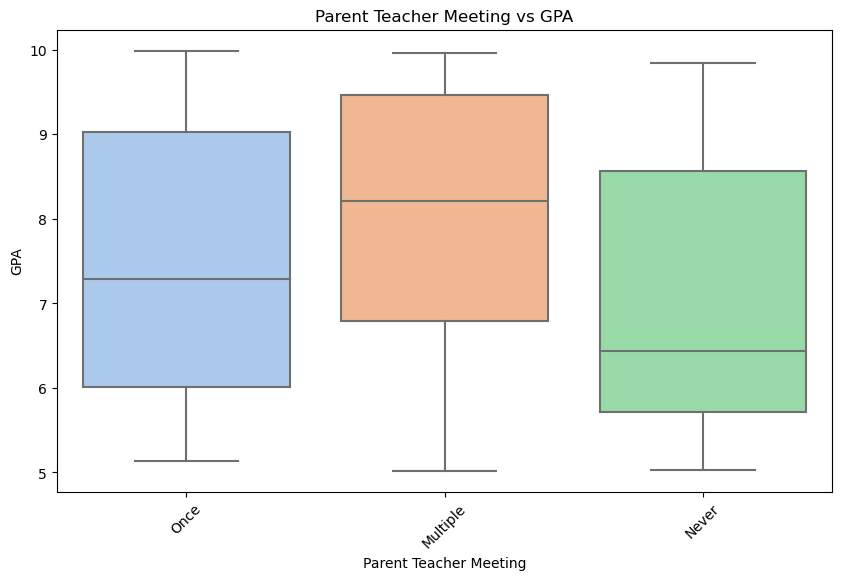

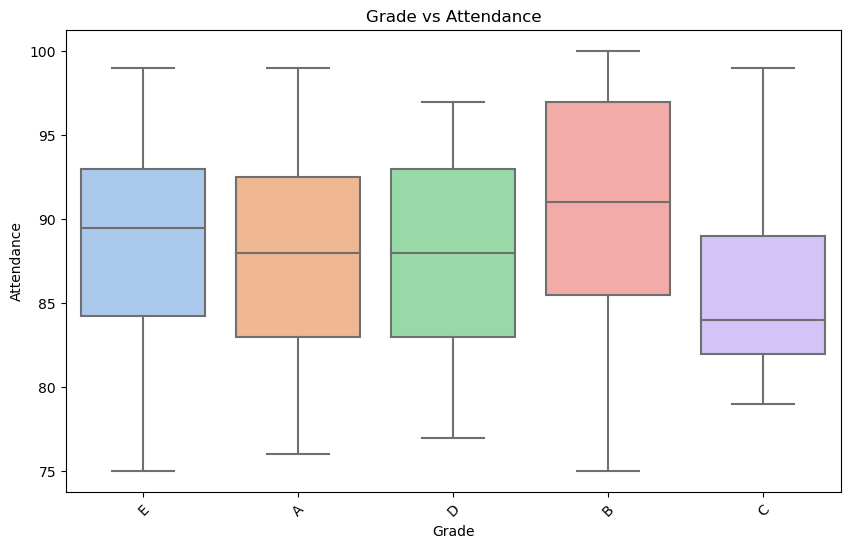

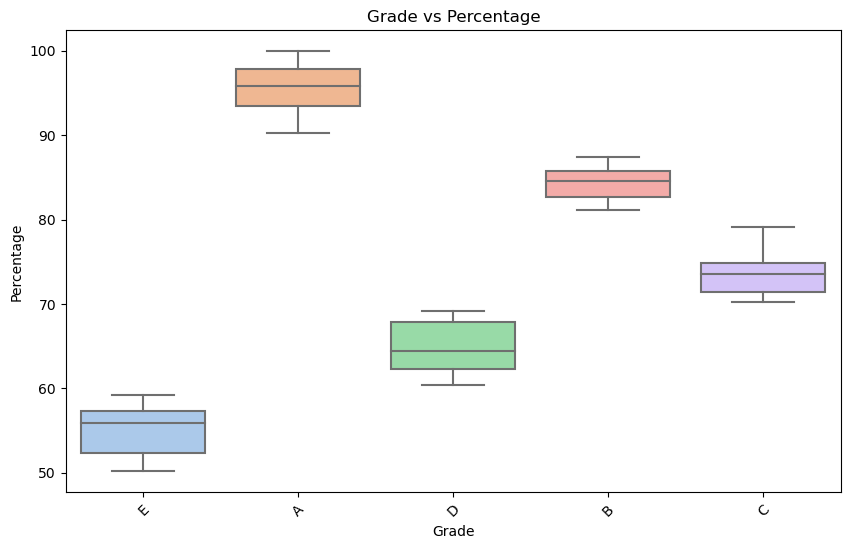

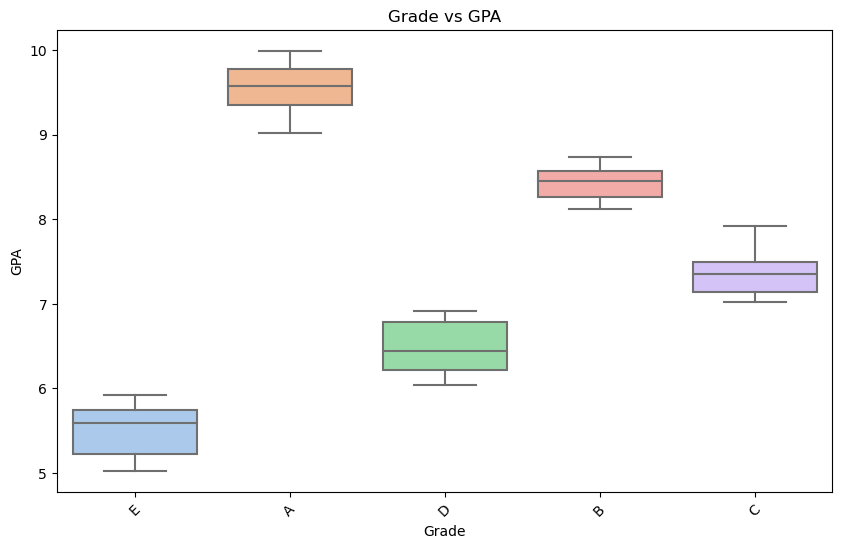

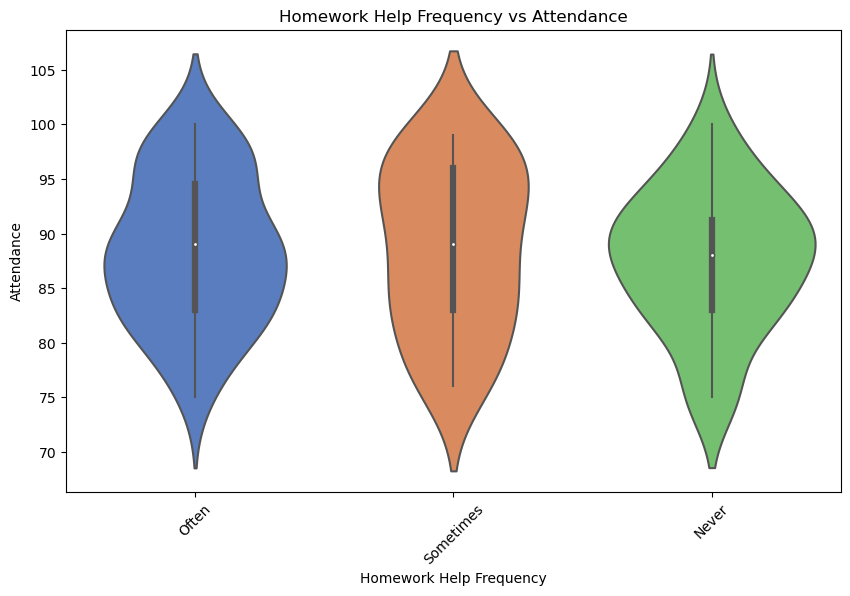

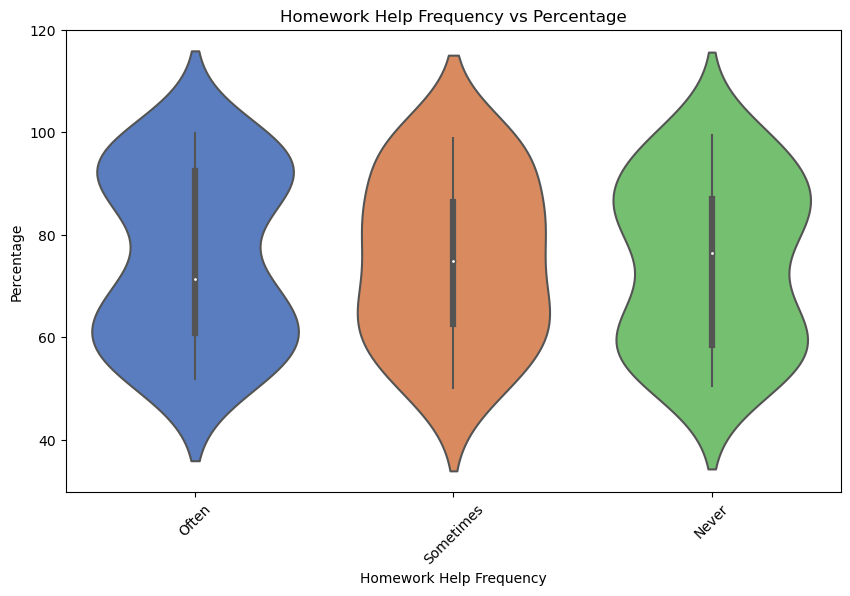

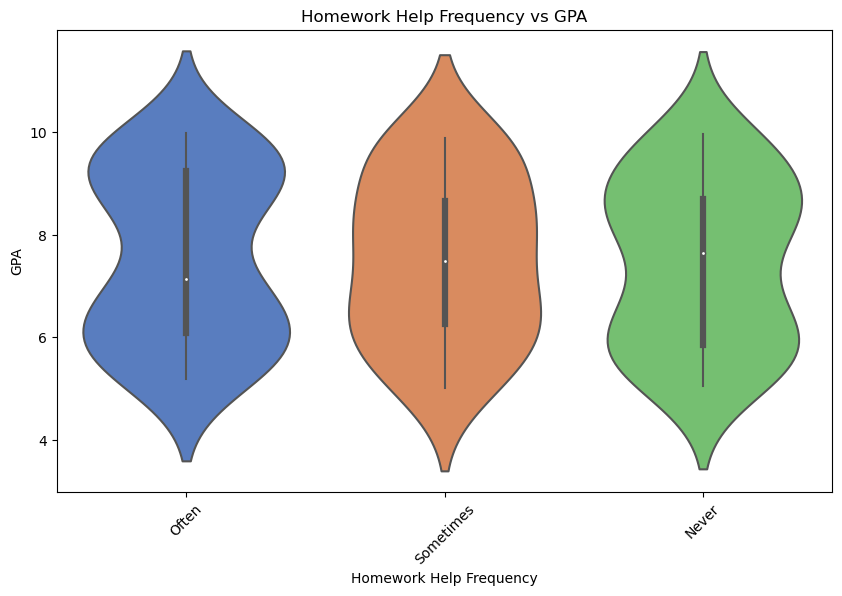

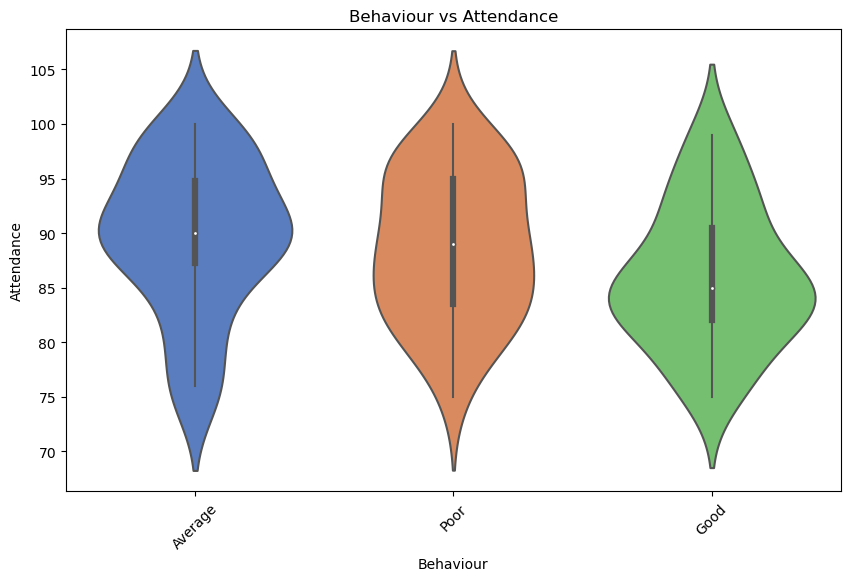

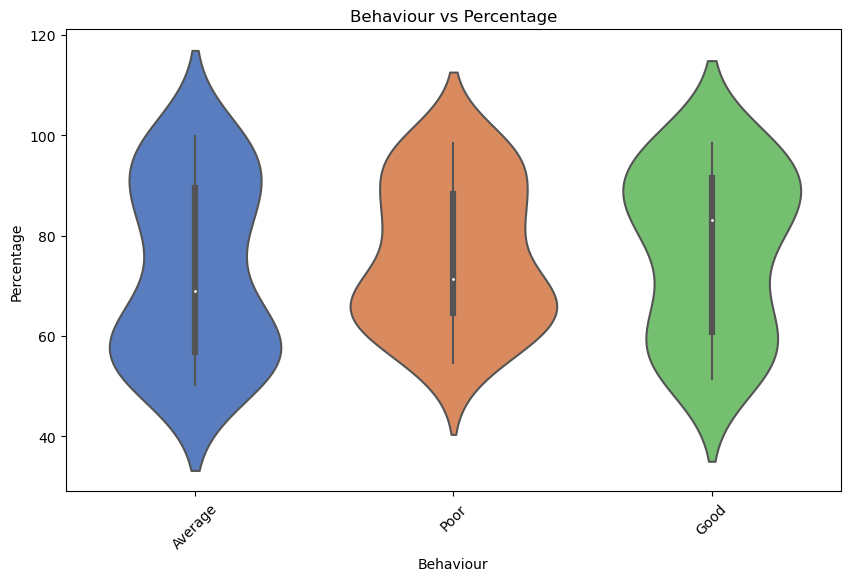

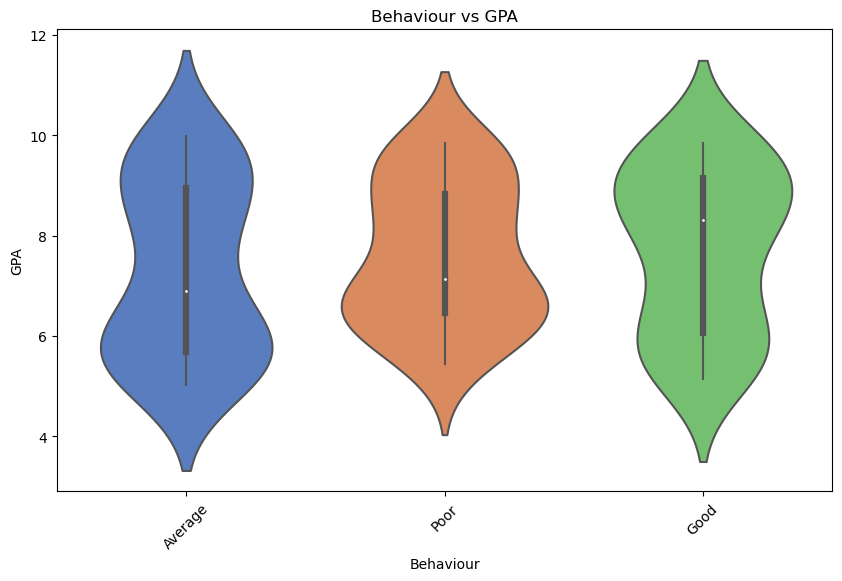

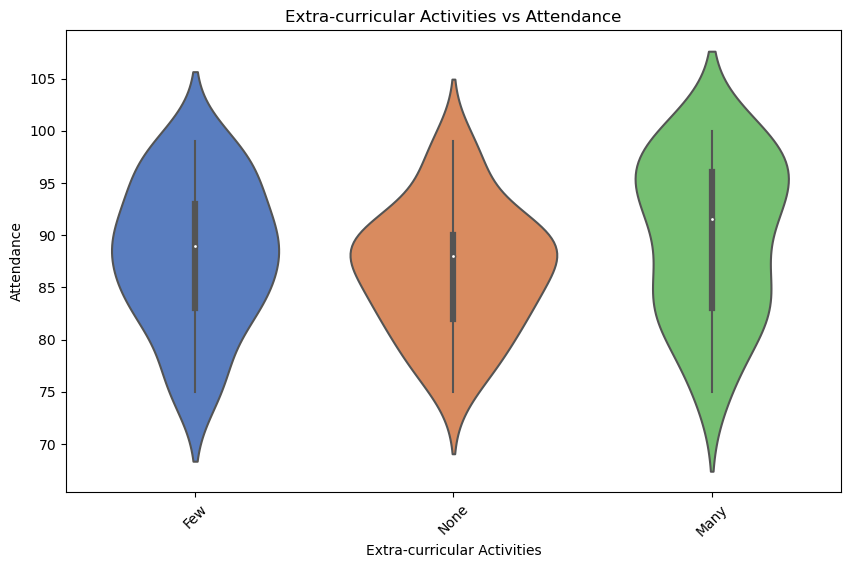

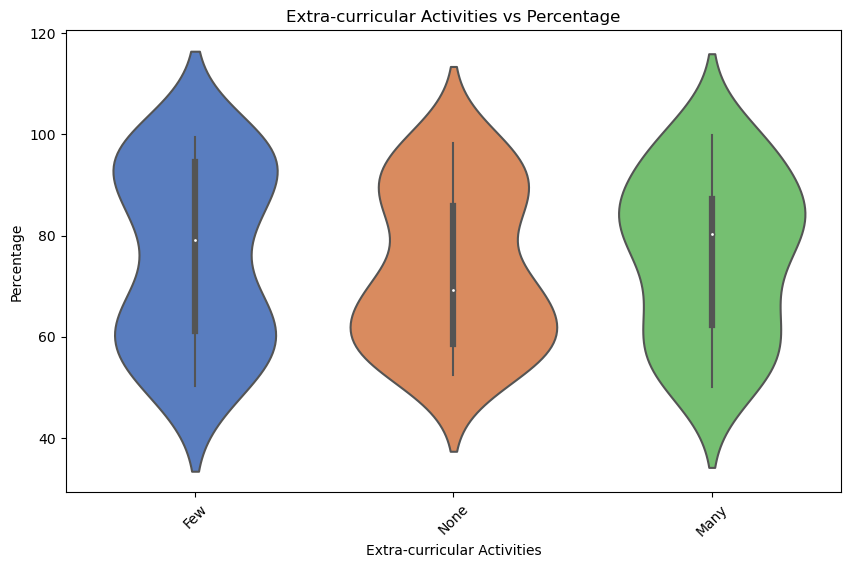

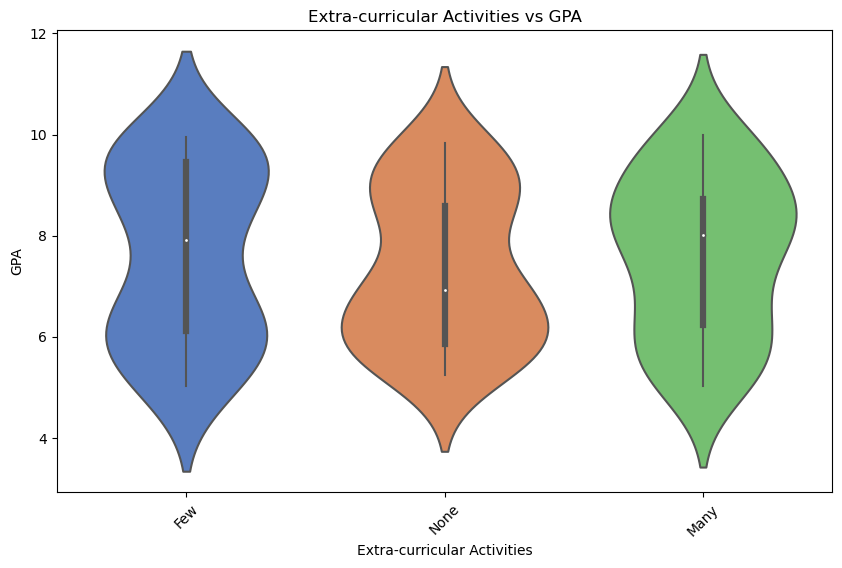

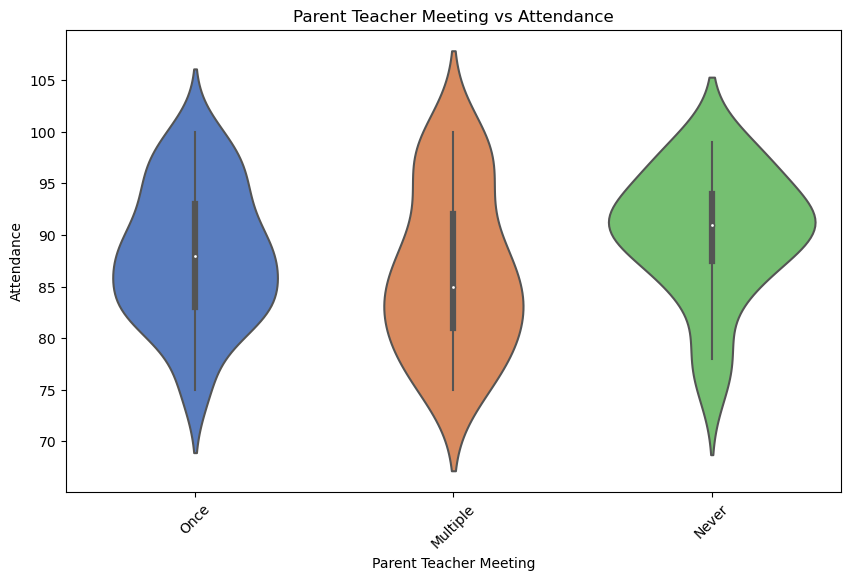

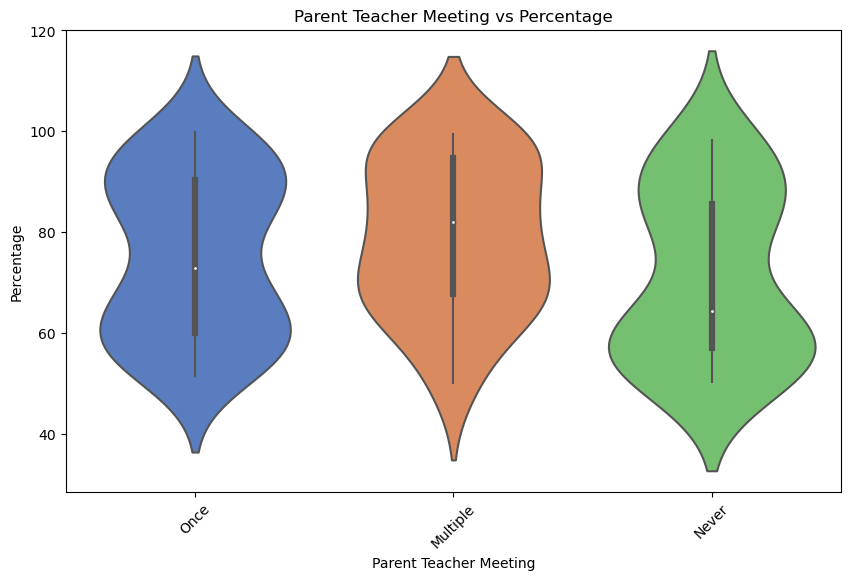

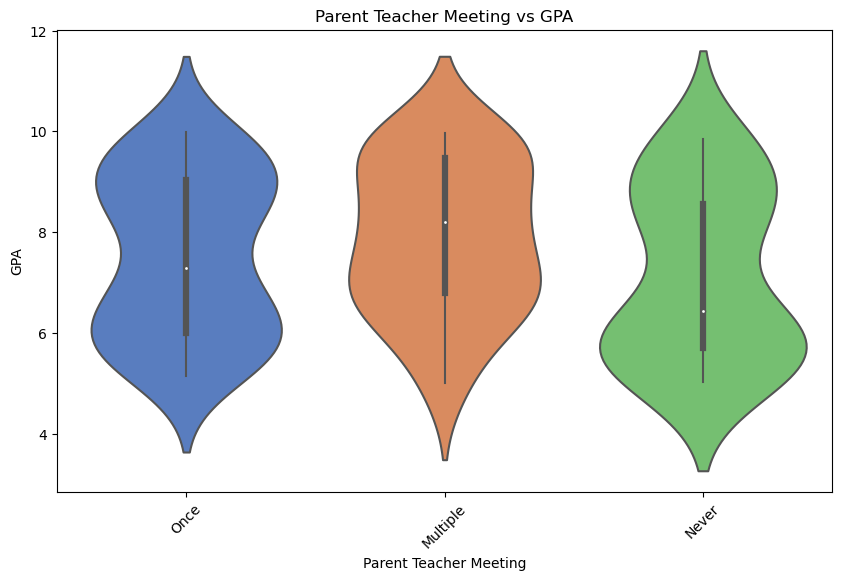

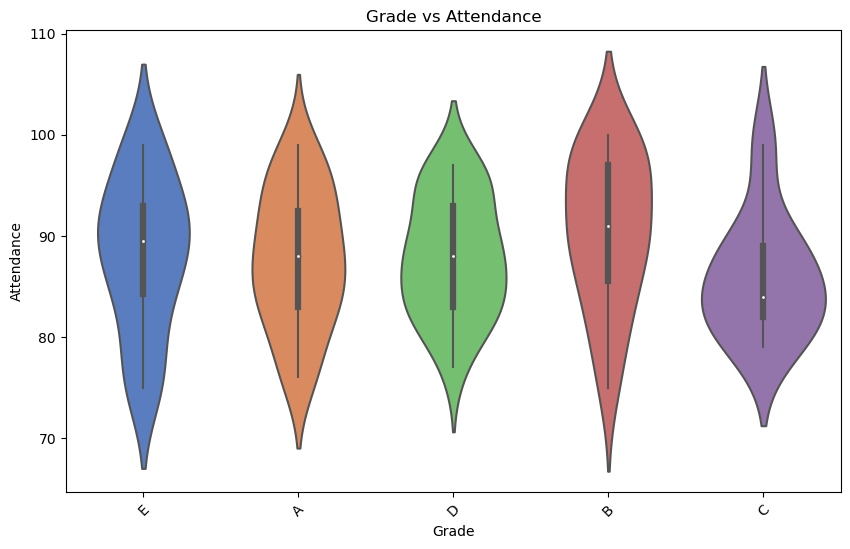

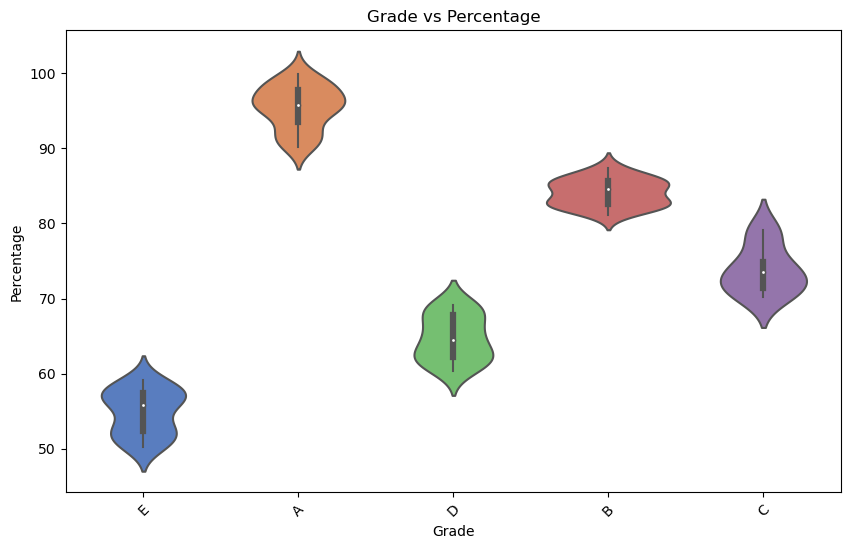

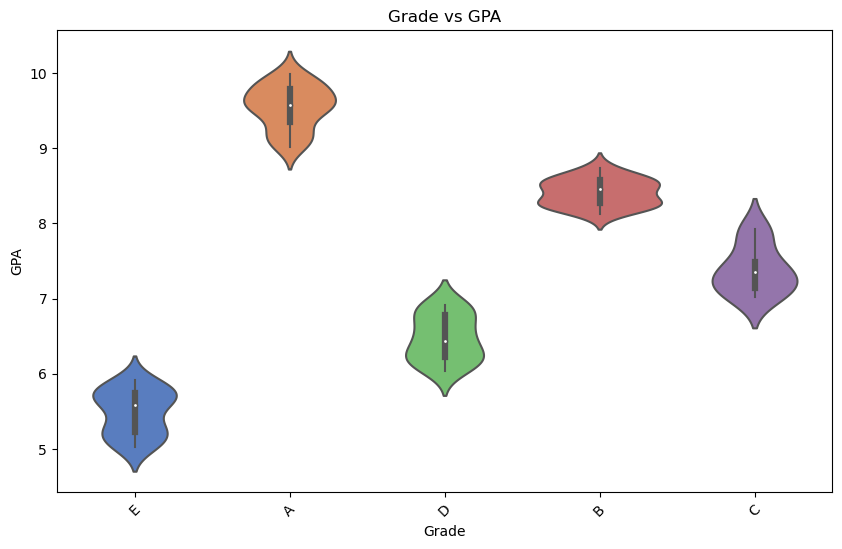

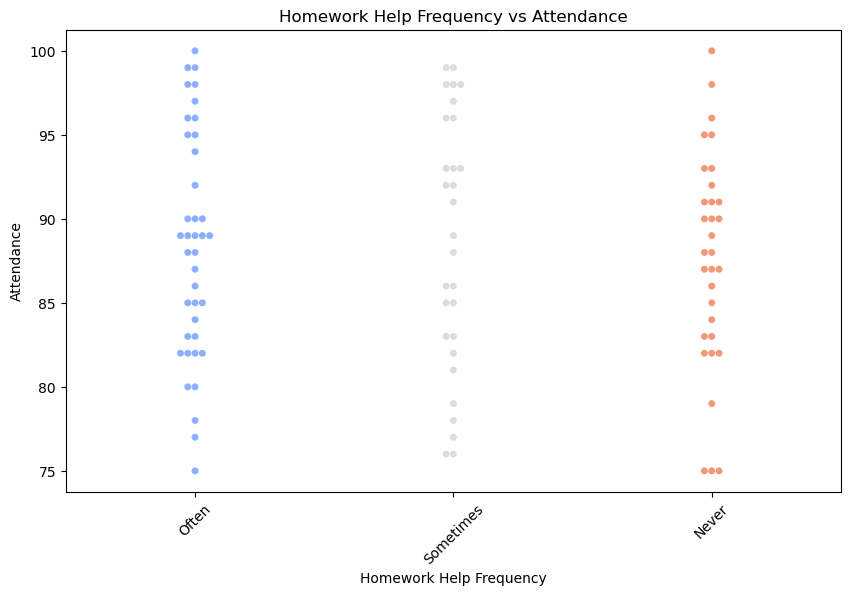

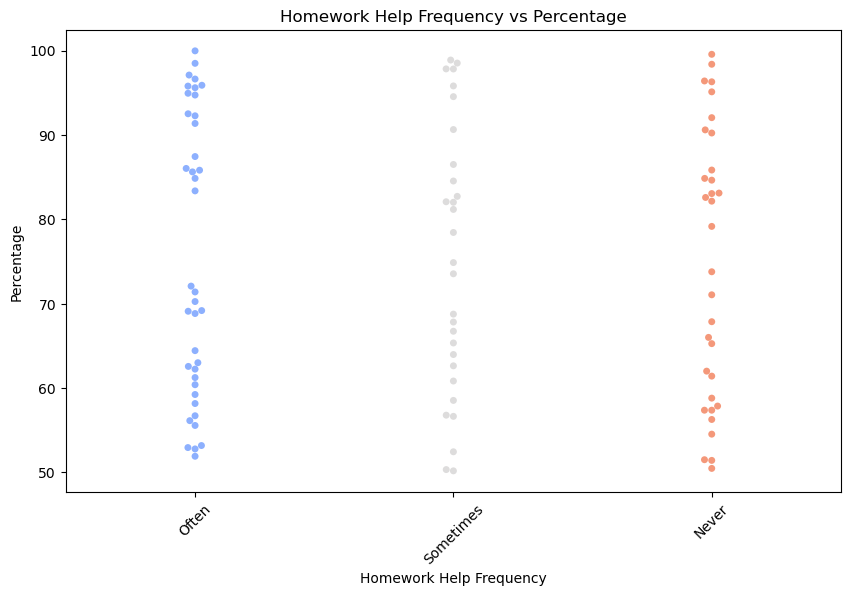

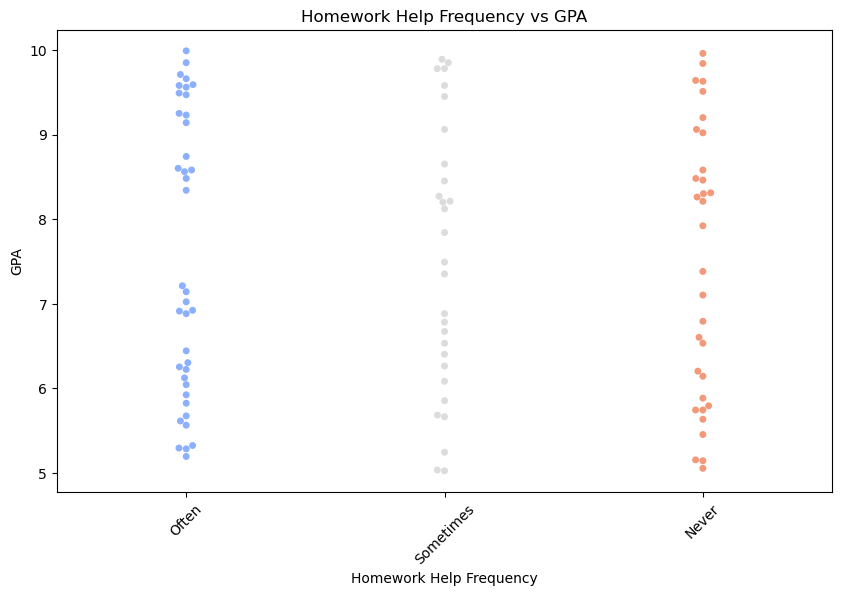

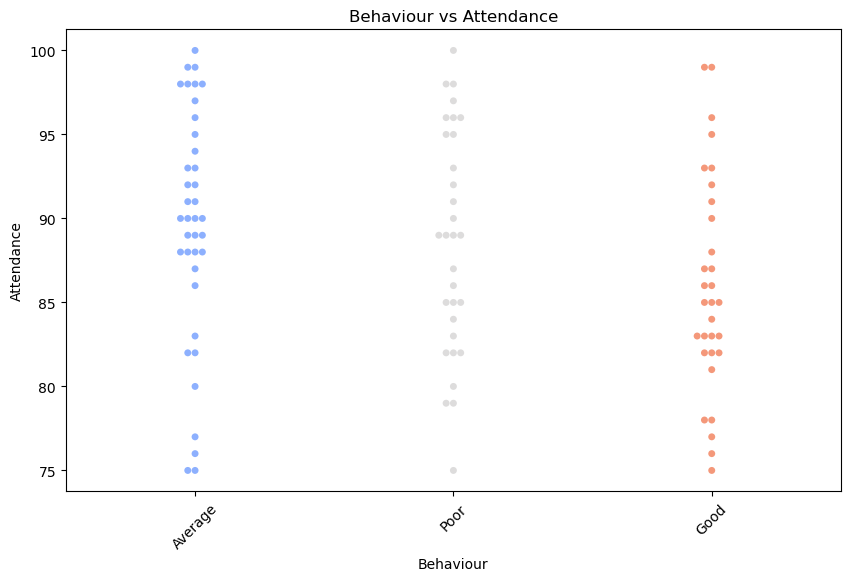

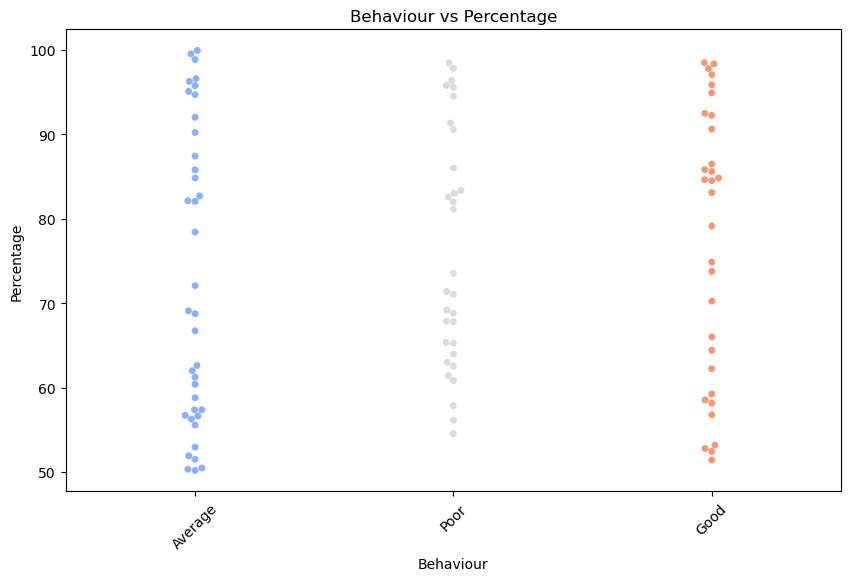

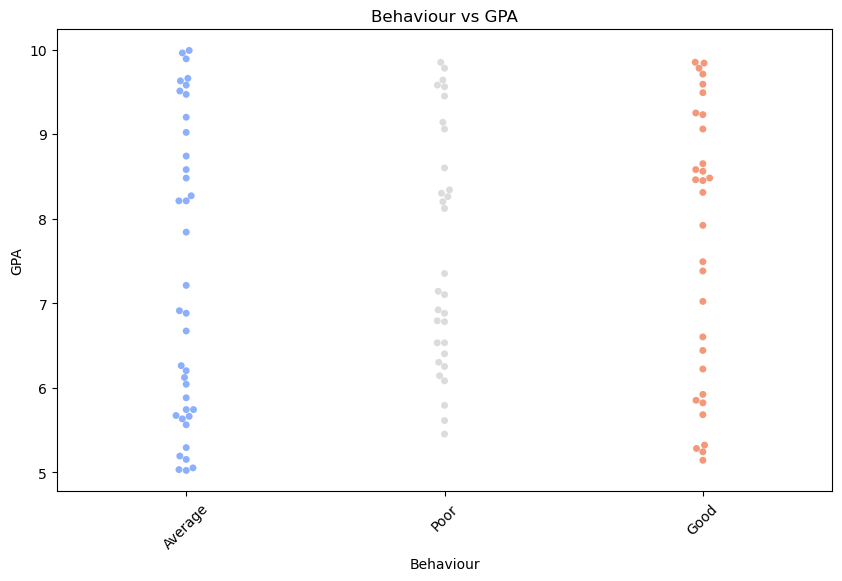

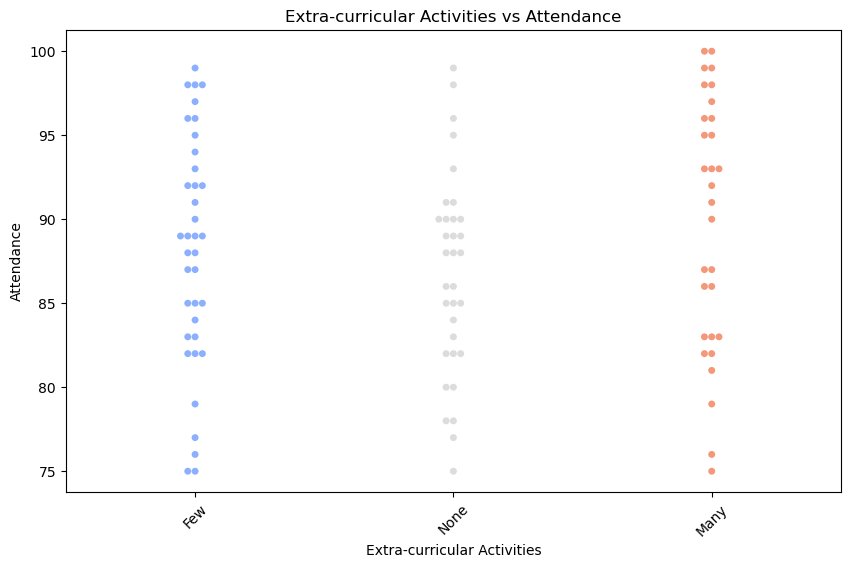

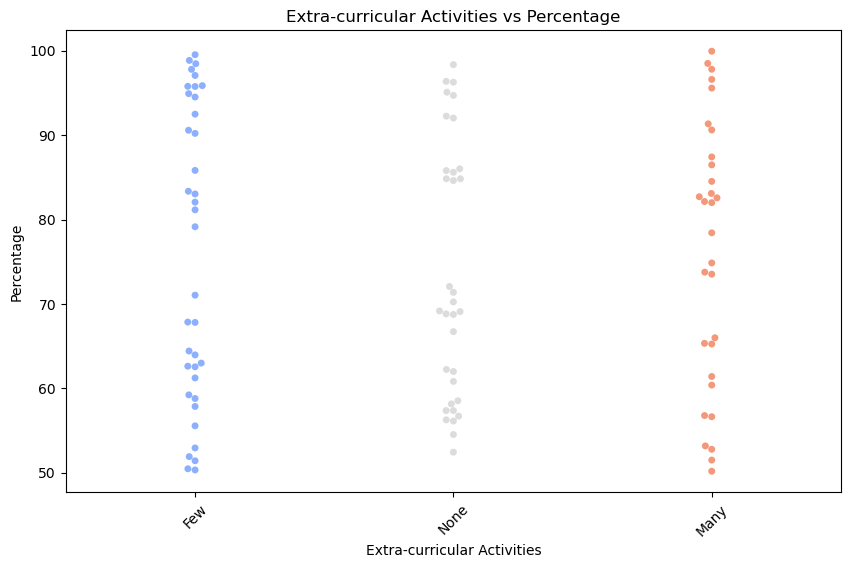

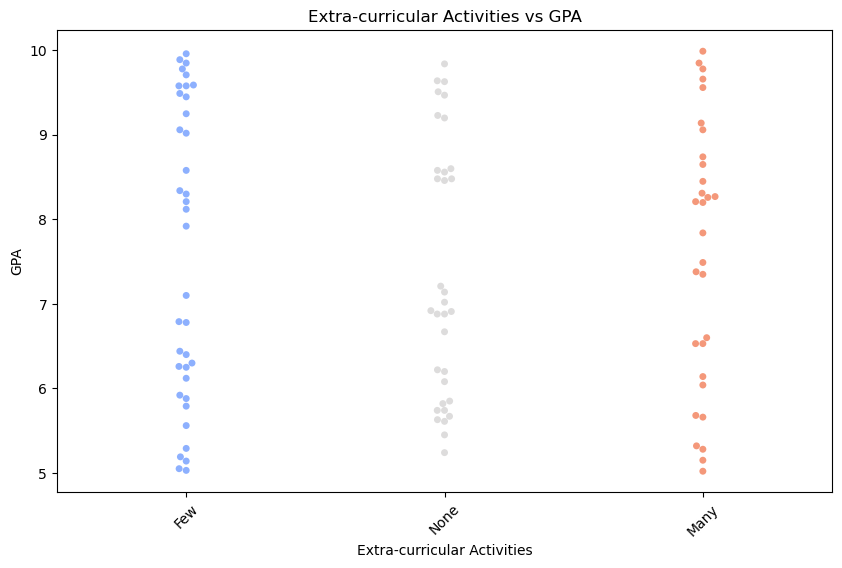

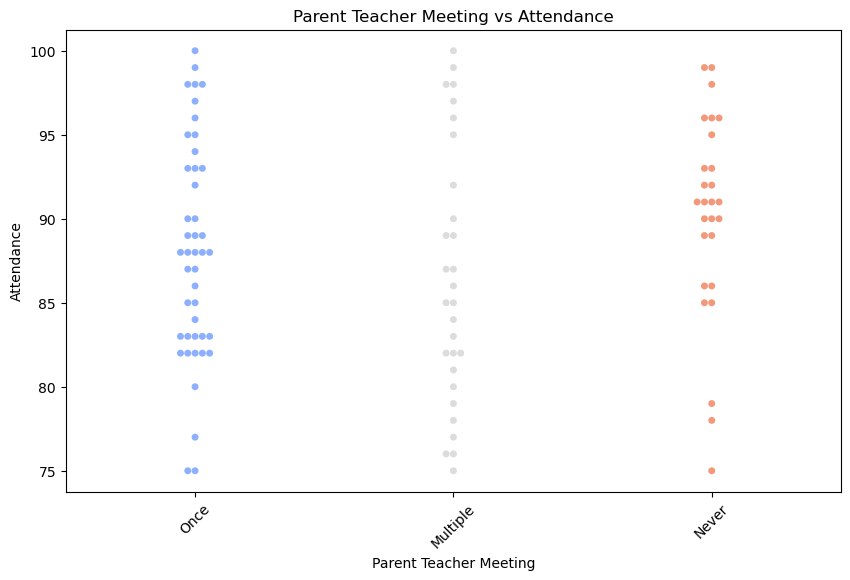

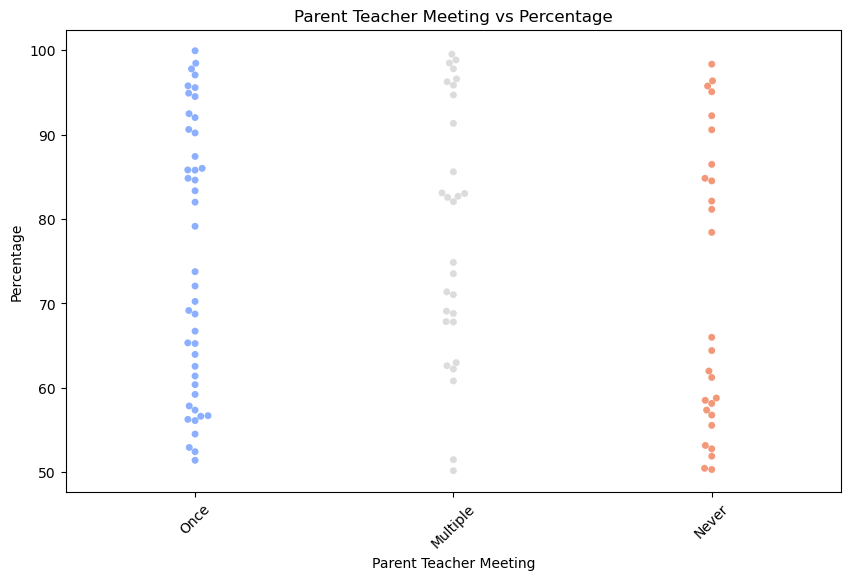

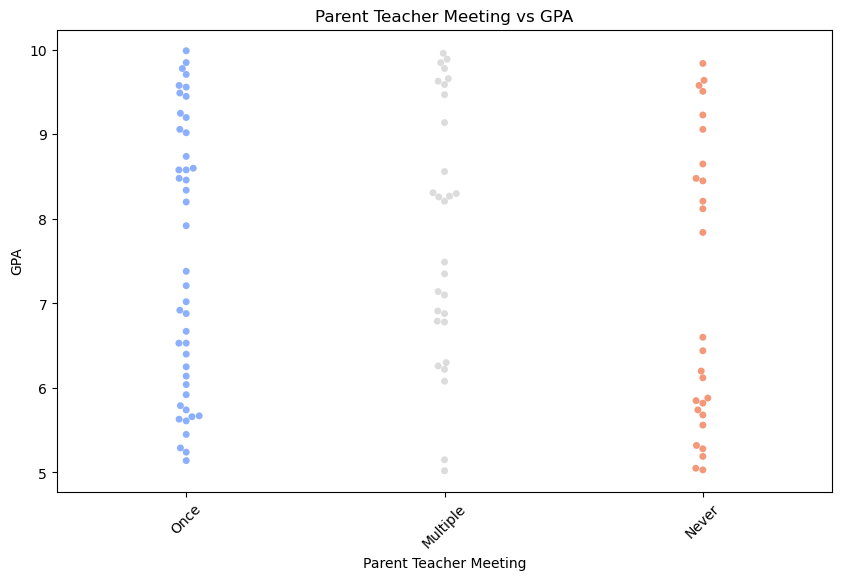

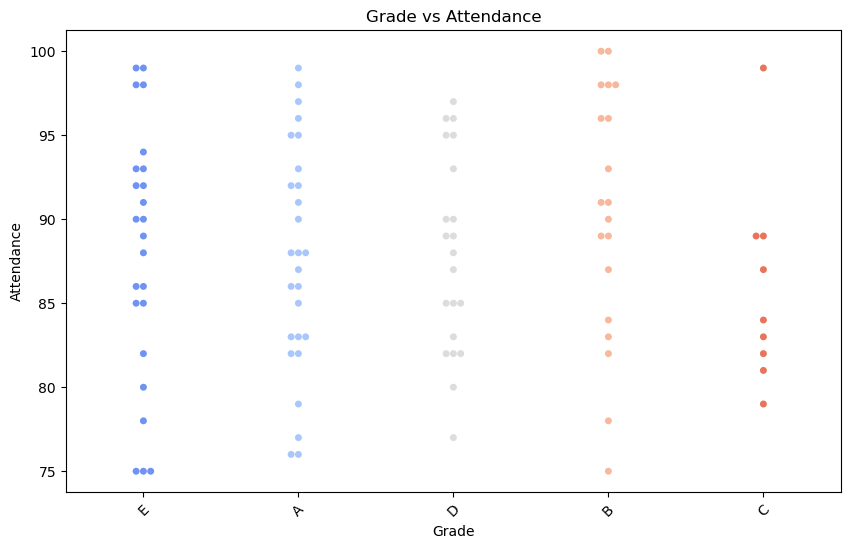

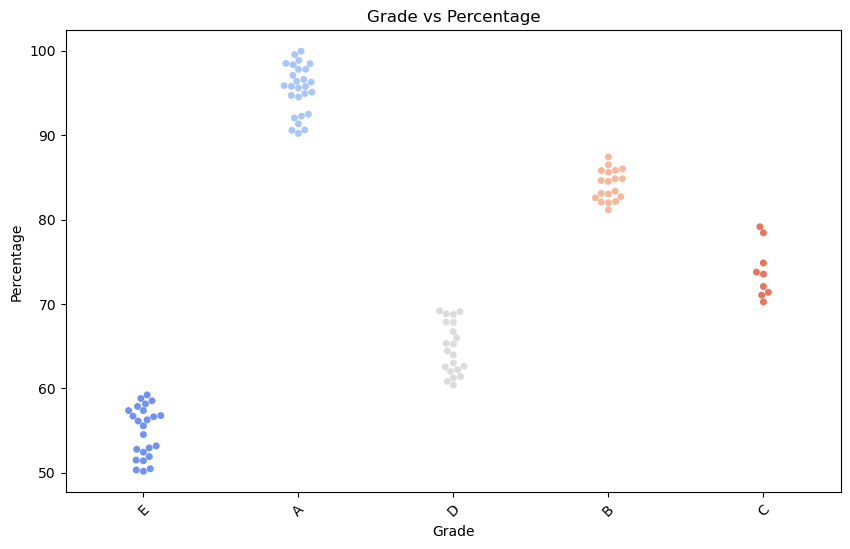

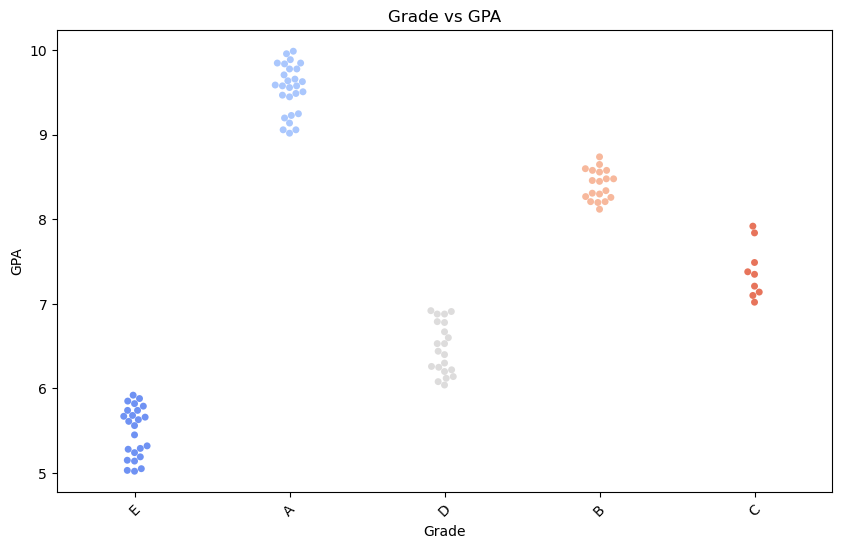

In [21]:
# Box plots for categorical vs numerical
for cat in categorical_columns:
    for num in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat, y=num, data=ps, palette='pastel')
        plt.title(f'{cat} vs {num}')
        plt.xticks(rotation=45)
        plt.show()

# Violin plots for categorical vs numerical
for cat in categorical_columns:
    for num in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=cat, y=num, data=ps, palette='muted')
        plt.title(f'{cat} vs {num}')
        plt.xticks(rotation=45)
        plt.show()

# Swarm plots for categorical vs numerical
for cat in categorical_columns:
    for num in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.swarmplot(x=cat, y=num, data=ps, palette='coolwarm')
        plt.title(f'{cat} vs {num}')
        plt.xticks(rotation=45)
        plt.show()


# MULTIVARIATE ANALYSIS

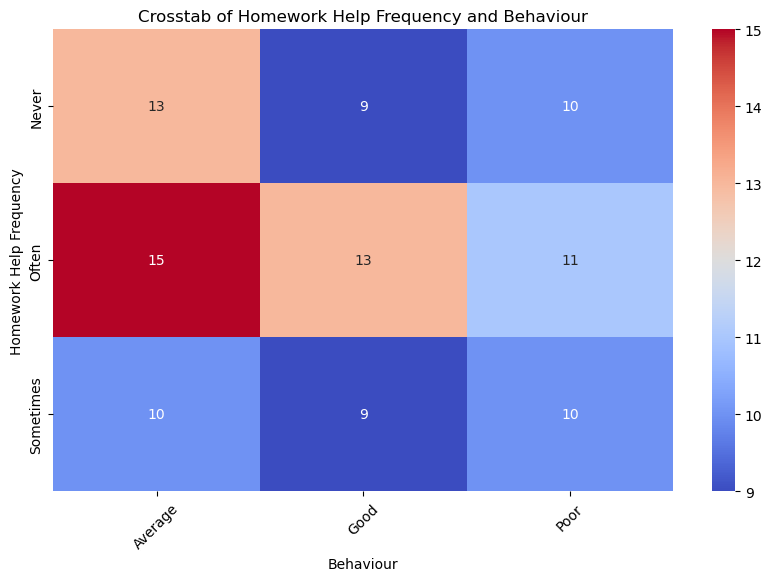

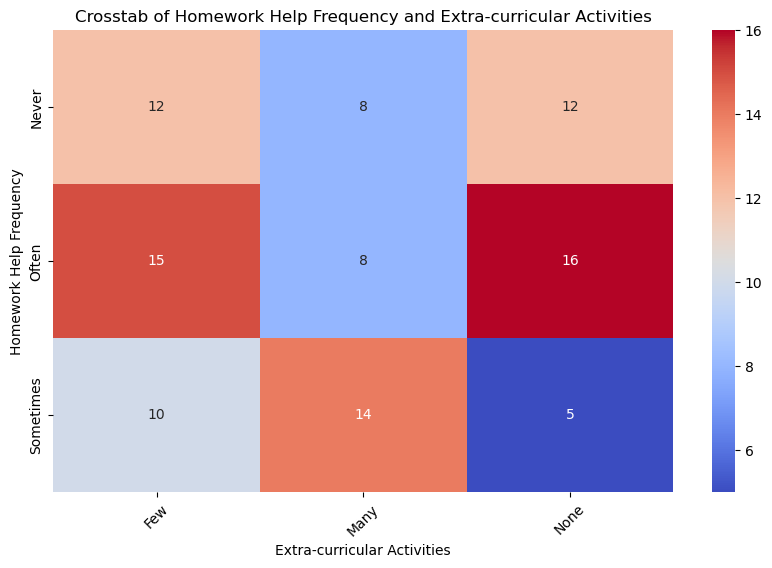

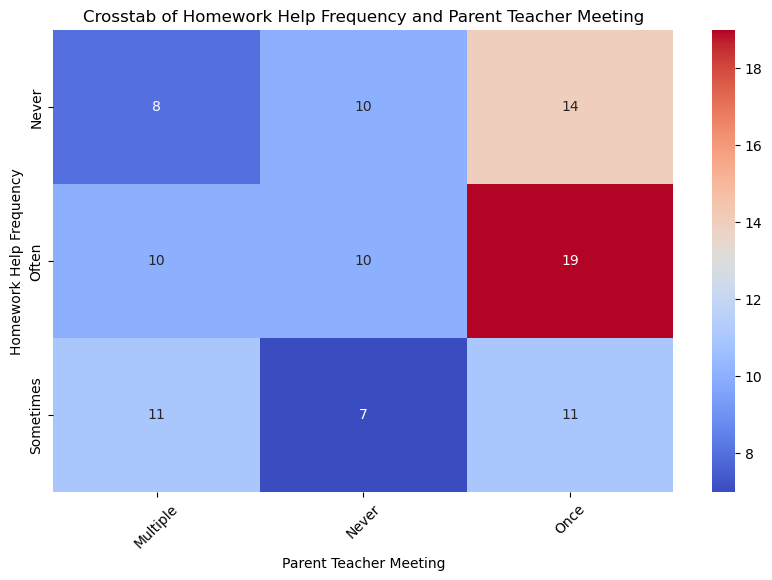

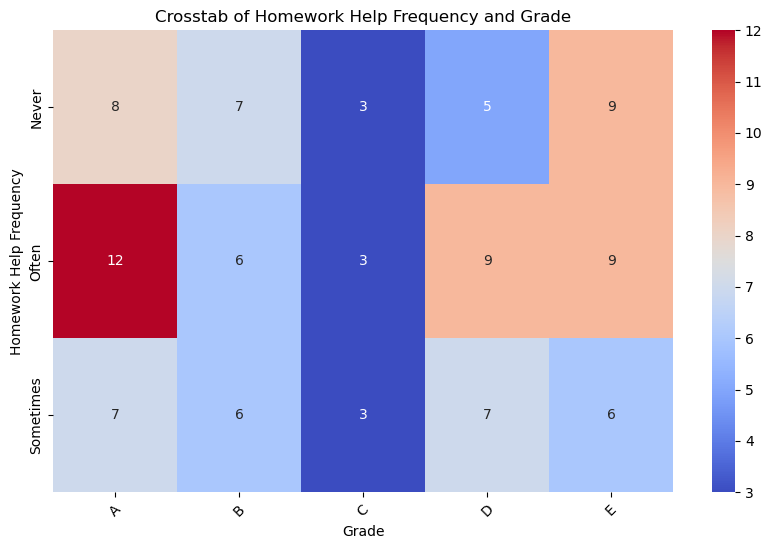

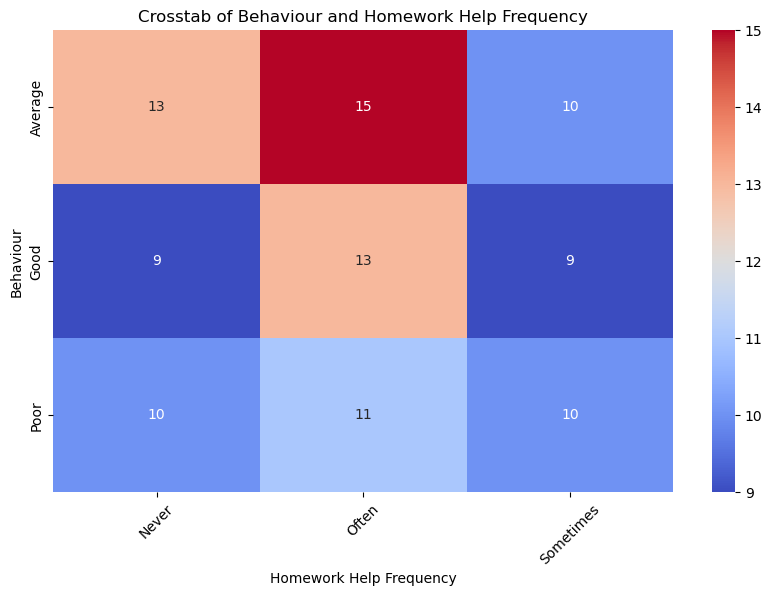

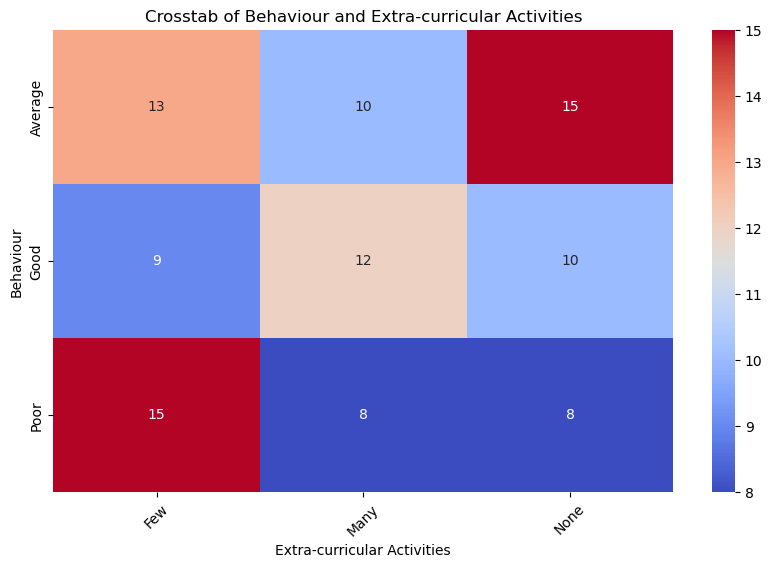

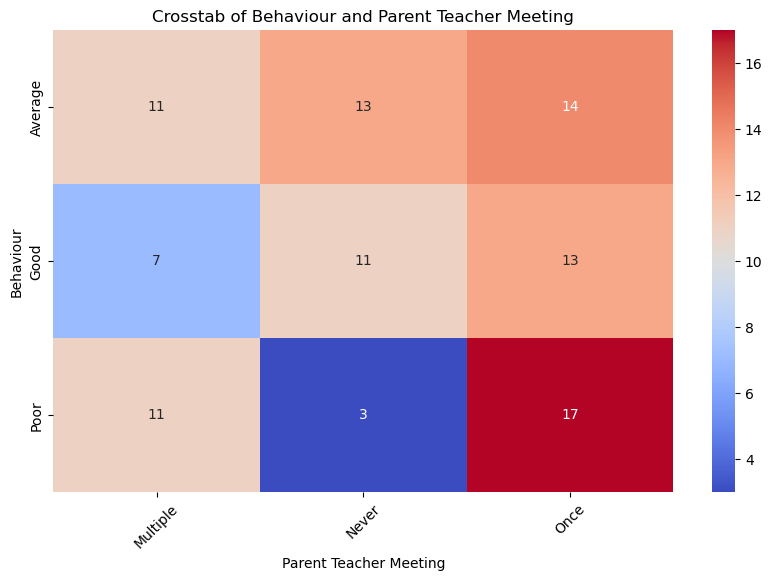

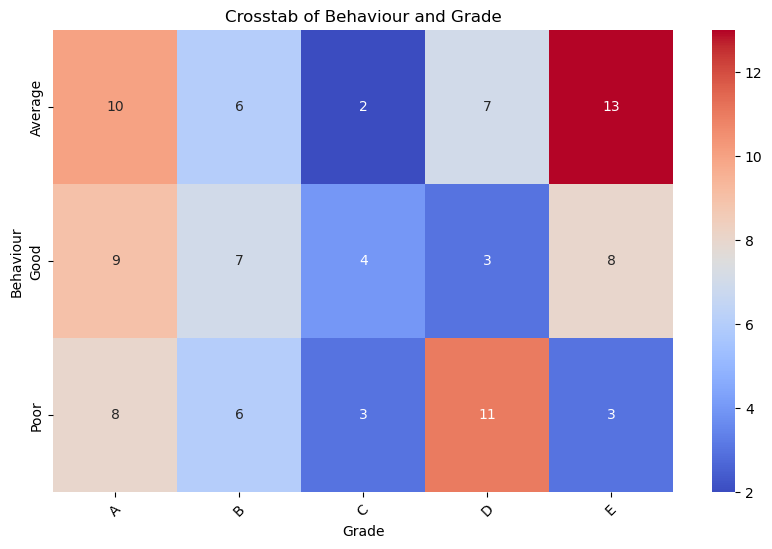

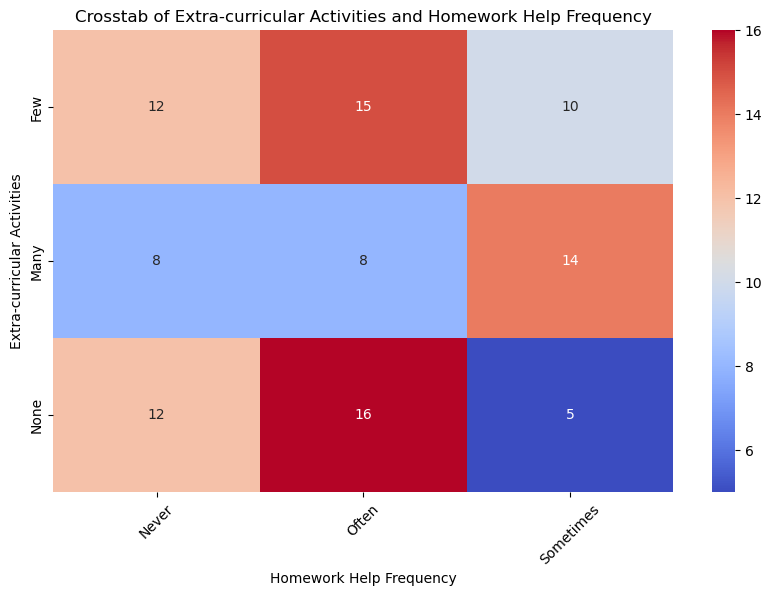

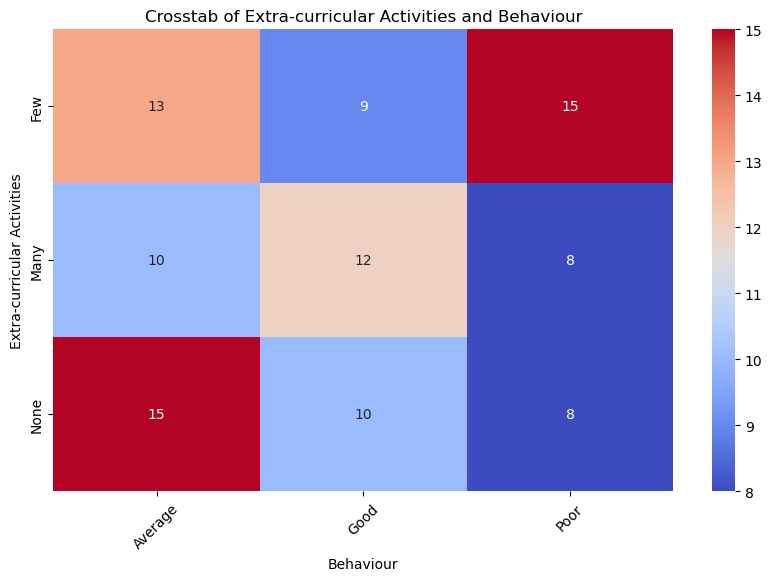

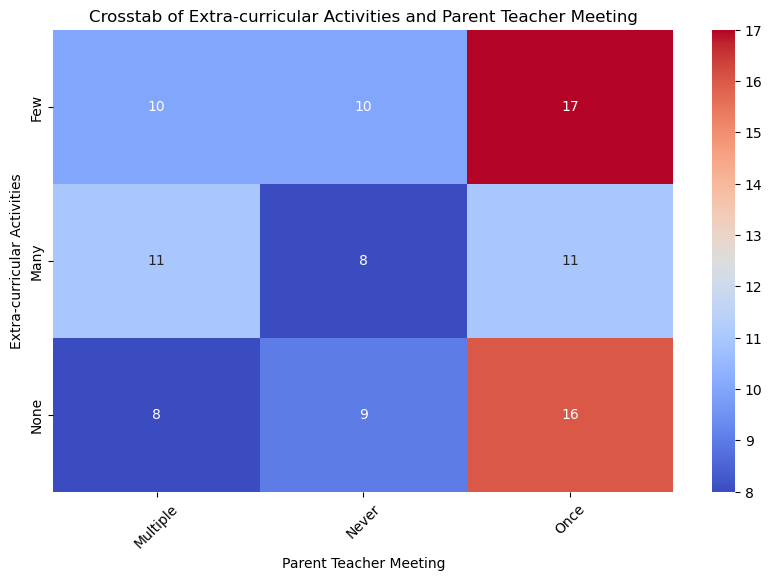

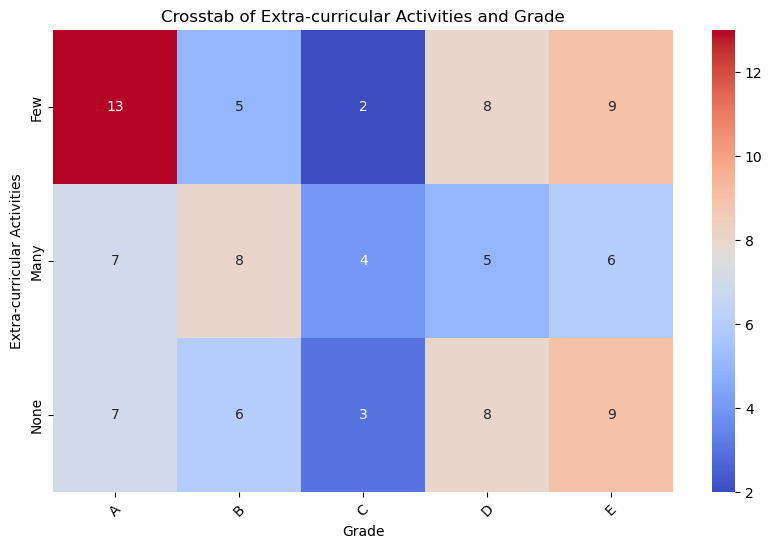

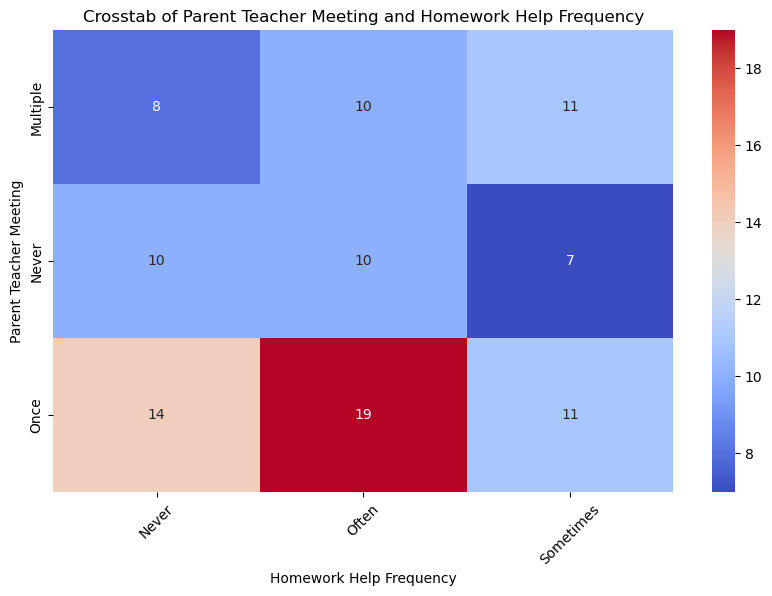

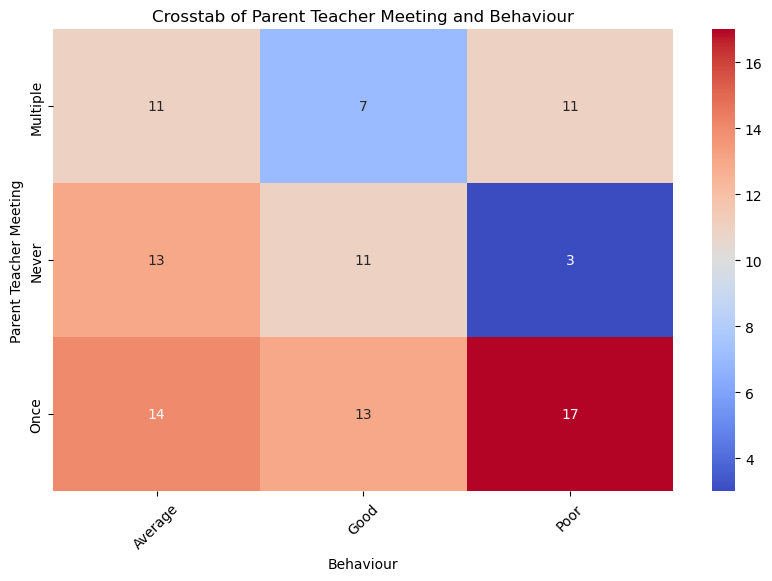

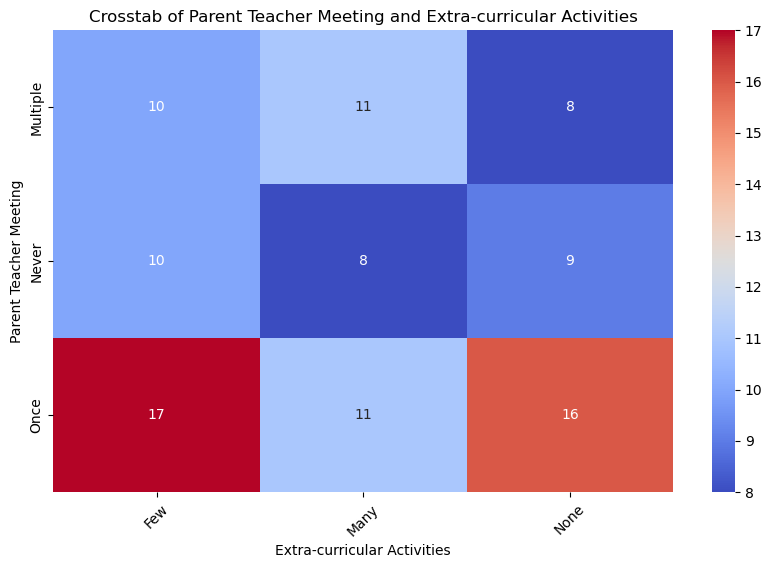

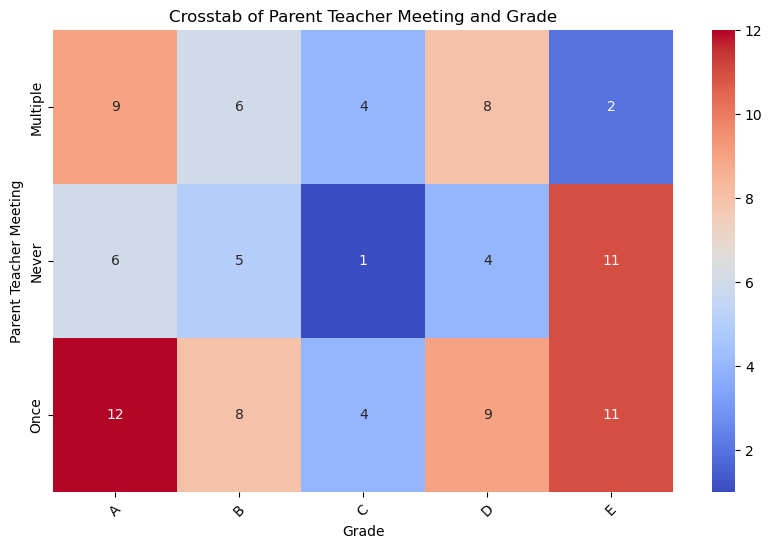

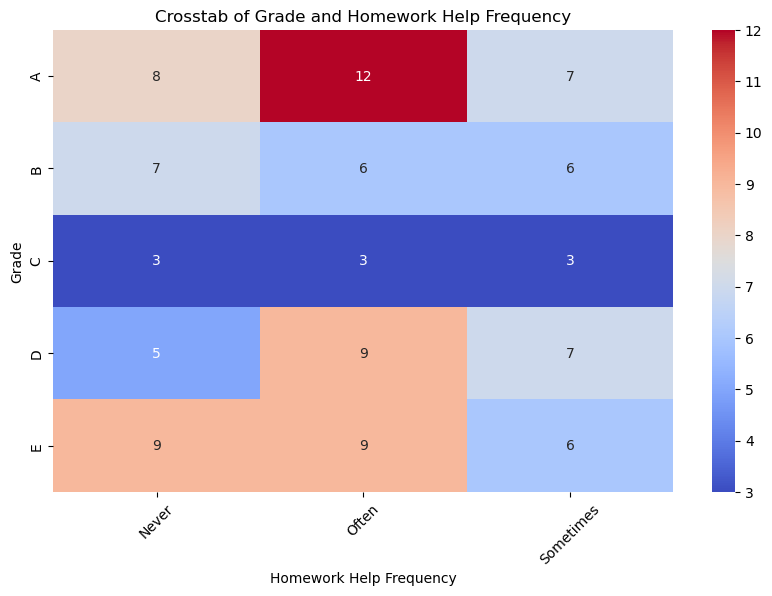

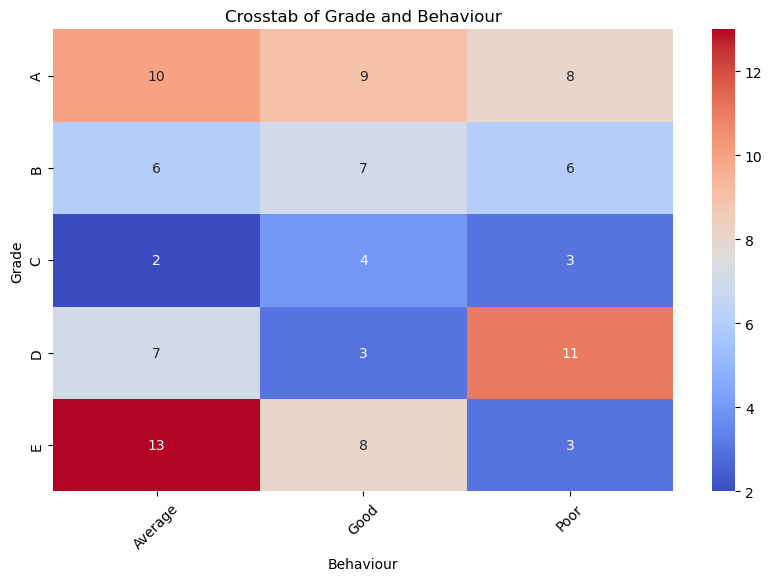

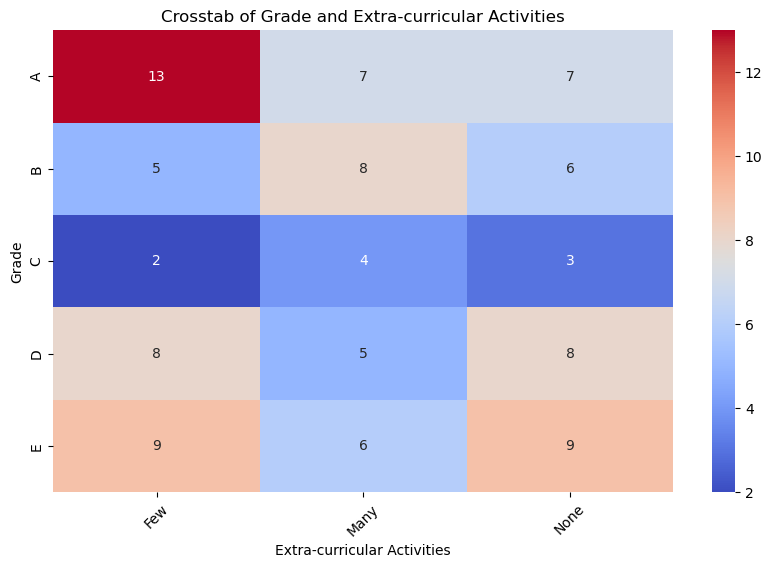

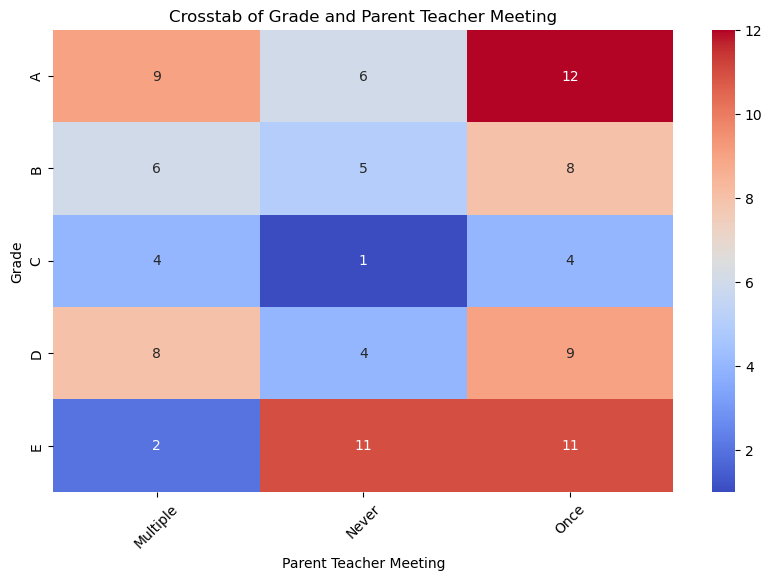

In [22]:
# Crosstab and heatmap for categorical vs categorical
for cat1 in categorical_columns:
    for cat2 in categorical_columns:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            crosstab = pd.crosstab(ps[cat1], ps[cat2])
            sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')
            plt.title(f'Crosstab of {cat1} and {cat2}')
            plt.xticks(rotation=45)
            plt.show()


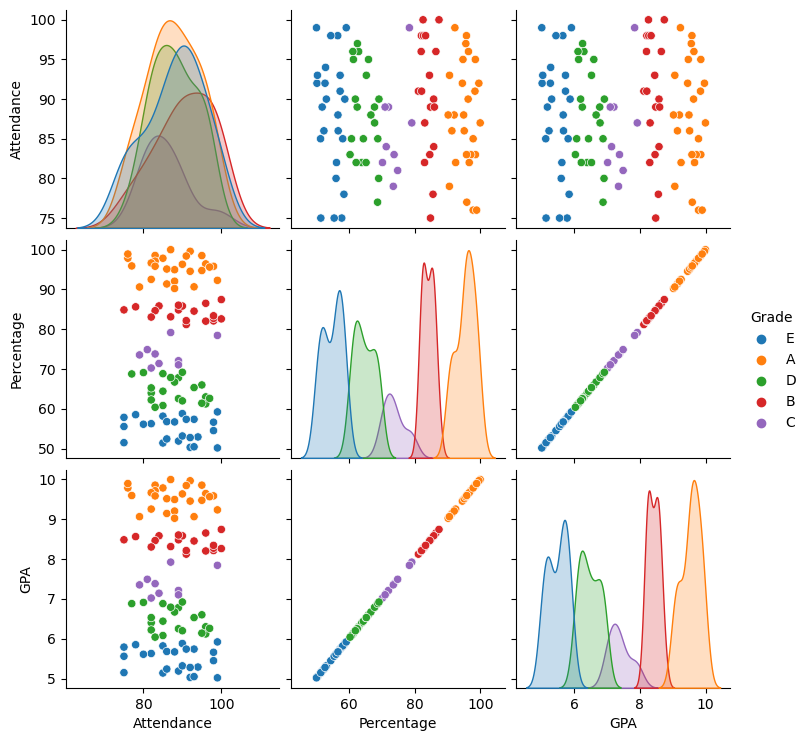

In [23]:
# Pairplot with hue for mixed variables
sns.pairplot(ps, hue='Grade', vars=numerical_columns)
plt.show()


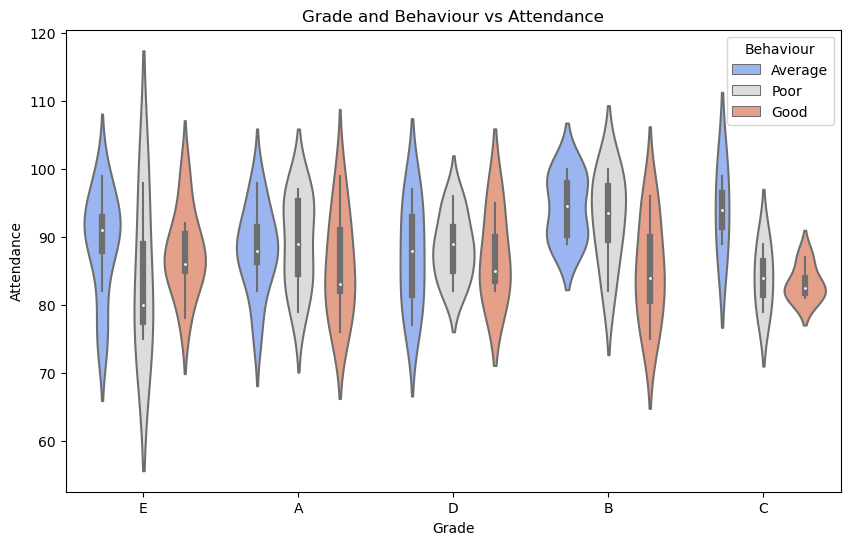

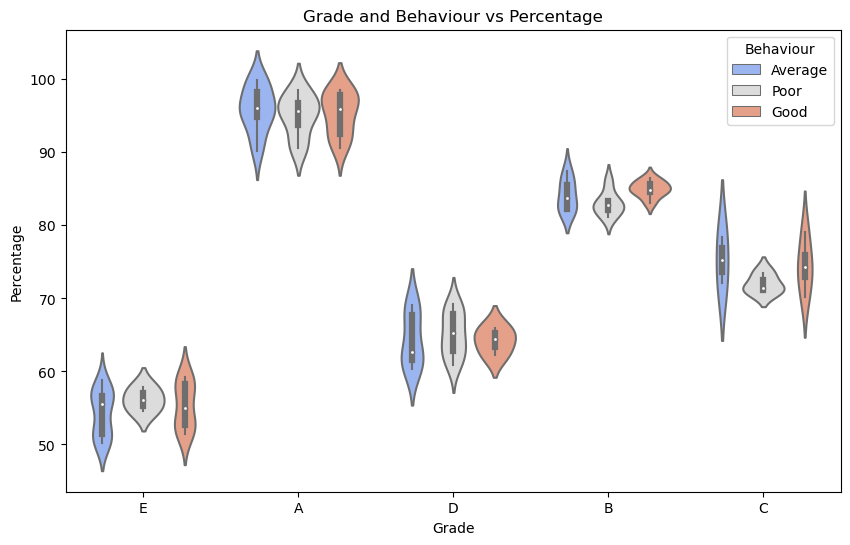

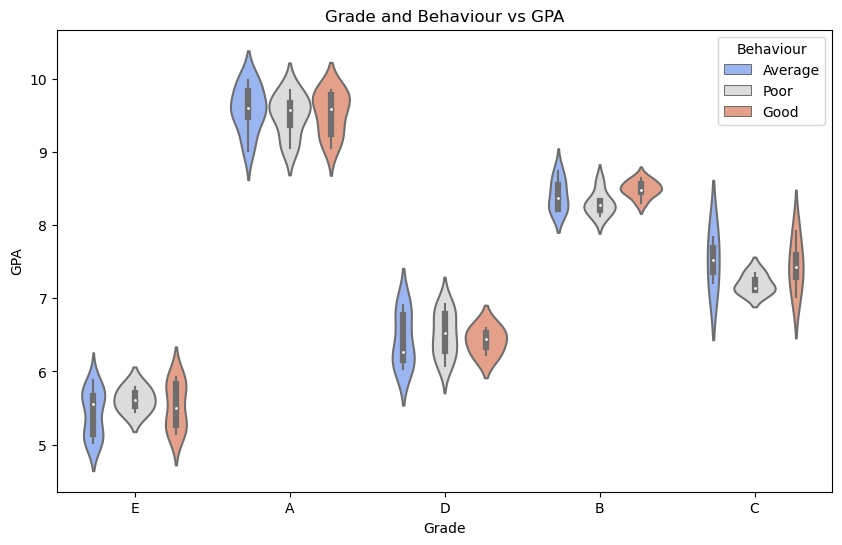

In [24]:
# Violin plots with hue for mixed variables
for num in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Grade', y=num, hue='Behaviour', data=ps, palette='coolwarm')
    plt.title(f'Grade and Behaviour vs {num}')
    plt.show()


# Encoding

In [25]:
# Drop unnecessary columns (assuming some columns are not needed, specify the column names to drop)
columns_to_drop = ['Student Name']  
ps = ps.drop(columns=columns_to_drop)

# Verify the columns are dropped
print(ps.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student ID                   100 non-null    int64  
 1   Homework Help Frequency      100 non-null    object 
 2   Behaviour                    100 non-null    object 
 3   Extra-curricular Activities  100 non-null    object 
 4   Parent Teacher Meeting       100 non-null    object 
 5   Attendance                   100 non-null    int64  
 6   Grade                        100 non-null    object 
 7   Percentage                   100 non-null    float64
 8   GPA                          100 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB
None


In [34]:
# Mapping for categorical columns
encoding_dict = {
    'Homework Help Frequency': {'Never': 0, 'Often': 1, 'Sometimes': 2},
    'Behaviour': {'Poor': 0, 'Bad': 1, 'Good': 2, 'Average': 3},
    'Extra-curricular Activities': {'None': 0, 'Few': 1, 'Some': 2, 'Many': 3, 'Extensive': 4},
    'Parent Teacher Meeting': {'Never': 0, 'Once': 1, 'Multiple': 2},
    'Grade': {'E':0, 'F': 1, 'D': 2, 'C': 3, 'B': 4, 'A': 5}
}

# Apply the encoding
ps.replace(encoding_dict, inplace=True)

# Verify the encoding
ps.head()

Student ID  Homework Help Frequency  Behaviour  \
0           1                        1          3   
1           2                        2          0   
2           3                        1          0   
3           4                        1          2   
4           5                        2          0   

   Extra-curricular Activities  Parent Teacher Meeting  Attendance  Grade  \
0                            1                       1          94      0   
1                            1                       1          85      4   
2                            1                       2          96      1   
3                            0                       0          99      4   
4                            1                       0          91      3   

   Percentage   GPA  
0       52.93  5.29  
1       97.81  9.78  
2       62.99  6.30  
3       92.26  9.23  
4       81.16  8.12

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [36]:
# Define the target variable and features
target = 'GPA'
features = ps.drop(columns=[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, ps[target], test_size=0.2, random_state=42)

# Verify the split
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


Training data shape: (80, 8)
Testing data shape: (20, 8)


In [37]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [41]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 0.00
Root Mean Squared Error: 0.00
R^2 Score: 1.00


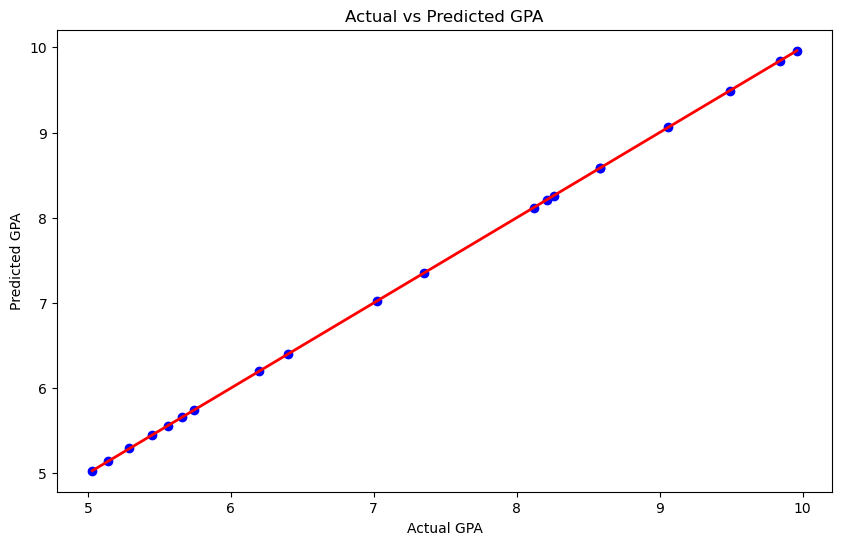

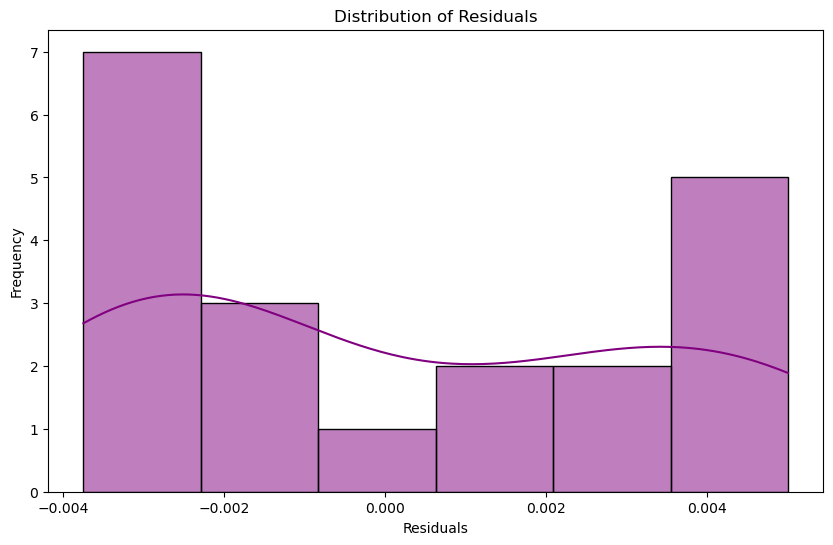

In [39]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA')
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
